In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

c:\Users\11094\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 训练集和测试集文件路径
train_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_add_cleaned_train.csv'
test_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_add_cleaned_test.csv'

# 预处理训练集
df_train = pd.read_csv(train_path)

df_train['h2'] = pd.to_numeric(df_train['h2'], errors='coerce')
df_train['ch4'] = pd.to_numeric(df_train['ch4'], errors='coerce')
df_train['c2h6'] = pd.to_numeric(df_train['c2h6'], errors='coerce')
df_train['c2h4'] = pd.to_numeric(df_train['c2h4'], errors='coerce')
df_train['c2h2'] = pd.to_numeric(df_train['c2h2'], errors='coerce')
df_train['act'] = pd.to_numeric(df_train['act'], errors='coerce')

df_train = df_train.reset_index(drop=True)  # 重置索引

# 预处理测试集
df_test = pd.read_csv(test_path)

df_test['h2'] = pd.to_numeric(df_test['h2'], errors='coerce')
df_test['ch4'] = pd.to_numeric(df_test['ch4'], errors='coerce')
df_test['c2h6'] = pd.to_numeric(df_test['c2h6'], errors='coerce')
df_test['c2h4'] = pd.to_numeric(df_test['c2h4'], errors='coerce')
df_test['c2h2'] = pd.to_numeric(df_test['c2h2'], errors='coerce')
df_test['act'] = pd.to_numeric(df_test['act'], errors='coerce')

df_test = df_test.reset_index(drop=True)  # 重置索引

# 现在，df_train 和 df_test 已经分别完成了预处理
print("训练集预处理完成，形状：", df_train.shape)
print("测试集预处理完成，形状：", df_test.shape)

训练集预处理完成，形状： (1436, 6)
测试集预处理完成，形状： (160, 6)


In [3]:
feature_cols = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2']
# 确保特征列为数值类型 (df_train)
for col in feature_cols:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# 确保目标列为整数类型 (df_train)
df_train['act'] = df_train['act'].astype(int)

print("训练集数据类型：")
print(df_train.dtypes)

# 确保特征列为数值类型 (df_test)
for col in feature_cols:
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

# 确保目标列为整数类型 (df_test)
df_test['act'] = df_test['act'].astype(int)

print("\n测试集数据类型：")
print(df_test.dtypes)

训练集数据类型：
h2      float64
ch4     float64
c2h6    float64
c2h4    float64
c2h2    float64
act       int32
dtype: object

测试集数据类型：
h2      float64
ch4     float64
c2h6    float64
c2h4    float64
c2h2    float64
act       int32
dtype: object


# 原始数据

In [4]:
train_data = df_train

In [7]:
train_data.head()

,h2,ch4,c2h6,c2h4,c2h2,act
0,35.0,283.0,121.0,222.0,0.0001,5
1,56.6,366.5,161.5,519.3,1.4000,2
2,19.0,62.0,95.0,5.0,0.0001,4
3,65.0,61.0,16.0,143.0,3.0000,2
4,148.7,247.5,178.7,192.2,0.9000,4


In [8]:
label = 'act'
train_data[label].describe()

count    1436.000000
mean        3.127437
std         1.541003
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: act, dtype: float64

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 从 test_data 中提取特征和目标变量
test_data = df_test
y_test = test_data['act']


# 加上所有特征

In [10]:
import pandas as pd
import numpy as np

# 假设 X 是一个 Pandas DataFrame，包含 h2, ch4, c2h6, c2h4, c2h2 列

train_all = df_train.copy()
test_all = df_test.copy()

def all_features(X):
    """
   扩展特征矩阵。

    Args:
        X (pd.DataFrame): 包含 h2, ch4, c2h6, c2h4, c2h2 列的特征矩阵。

    Returns:
        pd.DataFrame: 扩展后的特征矩阵。
    """
# CH4/H2、C2H2/C2H4、C2H4/C2H6
    # 计算比值
    R1 = X['c2h2'] / (X['c2h2'] + X['ch4'] + X['c2h6'])
    # R2= X['ch4'] /  (X['c2h2'] + X['ch4'] + X['c2h6'])
    # R3 = X['c2h6'] /  (X['c2h2'] + X['ch4'] + X['c2h6'])
    R4 = X['c2h4'] / (X['c2h6'])
    R5 = X['c2h2'] / (X['c2h4'])
    R6 = X['c2h2'] / (X['h2'] + X['ch4'] + X['c2h2'] + X['c2h4'] + X['c2h6'])
    R7 = X['c2h2'] /  (X['ch4'])
    R8 = (X['c2h2']+X['ch4']) / (X['h2'] )
    # R9 = X['h2'] / (X['c2h2'])
    # R10 = X['c2h2'] / (X['c2h4'] + X['ch4'] + X['c2h6'])
    # R11 = (X['ch4'] + X['c2h6']) / (X['h2'] + X['ch4'] + X['c2h2'] + X['c2h4'] + X['c2h6'])
    # E_H = X['energy_index'] = (X['h2'] * 1 + X['ch4'] * 2 + X['c2h6'] * 3 +  X['c2h4'] * 4 +  X['c2h2'] * 5)
    # # E_L = ( X['h2'] * 1 +  X['ch4'] * 2 + X['c2h6'] * 3)
    E = (X['h2'] * 1 + X['ch4'] * 2 + X['c2h6'] * 3 +  X['c2h4'] * 4 +  X['c2h2'] * 5)
    # 处理异常值
    R1 = R1.replace([np.inf, -np.inf], 0).fillna(0)
    #R2 = R2.replace([np.inf, -np.inf], 0).fillna(0)
    #R3 = R3.replace([np.inf, -np.inf], 0).fillna(0)
    R4 = R4.replace([np.inf, -np.inf], 0).fillna(0)
    R5 = R5.replace([np.inf, -np.inf], 0).fillna(0)
    R6 = R6.replace([np.inf, -np.inf], 0).fillna(0)
    R7 = R7.replace([np.inf, -np.inf], 0).fillna(0)
    R8 = R8.replace([np.inf, -np.inf], 0).fillna(0)
    # R9 = R9.replace([np.inf, -np.inf], 0).fillna(0)
    # R10 = R10.replace([np.inf, -np.inf], 0).fillna(0)
    # R11 = R11.replace([np.inf, -np.inf], 0).fillna(0)
    
    # E_H = E_H.replace([np.inf, -np.inf], 0).fillna(0)
    # E_L = E_L.replace([np.inf, -np.inf], 0).fillna(0)
    
    E = E.replace([np.inf, -np.inf], 0).fillna(0)
    # 添加到特征矩阵
    X['R1: C2H2/(C2H2+CH4+C2H6)'] = R1
    #X['R2: CH4/(C2H2+CH4+C2H6)'] = R2
    #X['R3: C2H6/(C2H2+CH4+C2H6)'] = R3
    X['R4: C2H4/C2H6'] = R4
    X['R5: C2H2/C2H4'] = R5
    X['R6: C2H2/(H2+CH4+C2H2+C2H4+C2H6)'] = R6
    X['R7: C2H2/CH4'] = R7
    X['R8: (C2H2+CH4)/H2'] = R8
    # X['R9: H2/C2H2'] = R9
    # X['R10: C2H2/C2H4+C2H6+CH4'] = R10
    # X['R11: C2H6+CH4/(H2+CH4+C2H2+C2H4+C2H6)'] = R11
    # X['energy_index'] = E
    # X['energy_low'] = E_L
    # X['energy_high'] = E_H

    return X

# 示例用法
# 假设 X_train 和 X_test 是你的训练集和测试集
train_all = all_features(train_all)
test_all = all_features(test_all)

train_all = train_all.drop(columns=['c2h2', 'c2h6', 'ch4'])
test_all = test_all.drop(columns=['c2h2', 'c2h6', 'ch4'])

# 现在 X_train_extended 和 X_test_extended 包含了扩展后的特征
print(test_all)

        h2     c2h4  act  R1: C2H2/(C2H2+CH4+C2H6)  R4: C2H4/C2H6  \
0      2.7  174.700    5              0.000000e+00       1.868449   
1    195.9    2.400    6              3.831403e-06       0.206897   
2    980.0   12.000    6              7.633582e-07       0.206897   
3      8.0   21.000    2              1.461988e-02       1.000000   
4     86.0  338.000    2              2.941168e-06       5.365079   
..     ...      ...  ...                       ...            ...   
155   16.0  395.000    2              3.906250e-01      13.166667   
156   39.8  380.000    2              0.000000e+00       3.392857   
157   86.0   92.000    2              1.333333e-01      13.142857   
158   12.0    3.000    4              7.692249e-06       0.029412   
159  113.0    0.001    6              5.479452e-02       0.000021   

     R5: C2H2/C2H4  R6: C2H2/(H2+CH4+C2H2+C2H4+C2H6)  R7: C2H2/CH4  \
0         0.000000                      0.000000e+00      0.000000   
1         0.000042             

In [11]:
all_train_data = train_all

In [12]:
all_train_data.head()

,h2,c2h4,act,R1: C2H2/(C2H2+CH4+C2H6),R4: C2H4/C2H6,R5: C2H2/C2H4,R6: C2H2/(H2+CH4+C2H2+C2H4+C2H6),R7: C2H2/CH4,R8: (C2H2+CH4)/H2
0,35.0,222.0,5,2.475247e-07,1.834711,4.504505e-07,1.512859e-07,3.533569e-07,8.085717
1,56.6,519.3,2,2.644503e-03,3.215480,2.695937e-03,1.266624e-03,3.819918e-03,6.500000
2,19.0,5.0,4,6.369423e-07,0.052632,2.000000e-05,5.524859e-07,1.612903e-06,3.263163
3,65.0,143.0,2,3.750000e-02,8.937500,2.097902e-02,1.041667e-02,4.918033e-02,0.984615
4,148.7,192.2,4,2.107235e-03,1.075546,4.682622e-03,1.171875e-03,3.636364e-03,1.670477


In [13]:
label = 'act'
all_train_data[label].describe()

count    1436.000000
mean        3.127437
std         1.541003
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: act, dtype: float64

In [14]:
predictor_all = TabularPredictor(label=label).fit(all_train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250419_190804"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       4.14 GB / 14.94 GB (27.7%)
Disk Space Avail:   123.09 GB / 244.14 GB (50.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

all_test_data = test_all
y_test = all_test_data['act']


In [16]:

# 进行预测
y_pred = predictor_all.predict(all_test_data.drop(columns=[label]))

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的召回率
f1 = f1_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的f1
precision = precision_score(y_test, y_pred, average='weighted') #average='weighted'计算多分类的precision
confusion = confusion_matrix(y_test, y_pred)

# 打印评估指标
print("准确率：", accuracy)
print("召回率：", recall)
print("F1 分数：", f1)
print("精确率：", precision)
print("混淆矩阵：\n", confusion)

准确率： 0.86875
召回率： 0.86875
F1 分数： 0.8699385856883589
精确率： 0.8749500380145541
混淆矩阵：
 [[23  0  2  0  0  1]
 [ 1 52  2  1  1  0]
 [ 7  0 14  0  0  0]
 [ 0  3  0 26  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  3  0  0 10]]


In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 模型列表
models = [
    #'CatBoost',
    'ExtraTreesEntr',
    'XGBoost',
    'RandomForestGini',
    'ExtraTreesGini',
    'RandomForestEntr',
    #'WeightedEnsemble_L2',
    'LightGBMLarge',
    'LightGBMXT',
    'LightGBM',
    'NeuralNetTorch',
    'NeuralNetFastAI',
    'KNeighborsDist',
    'KNeighborsUnif'
]

# 用于存储结果的列表
results = []

# 遍历所有模型
for model in models:
    # 进行预测
    y_pred = predictor_all.predict(all_test_data, model=model)
    y_test = all_test_data['act']

    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # 将结果添加到列表中
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision,
        'Confusion Matrix': confusion
    })

# 将结果转换为 DataFrame
df_results = pd.DataFrame(results)

# 保存结果到 CSV 文件
df_results.to_csv(r'D:\xjtufiles\3ee\DGA\results\all_cut_result.csv', index=False)

print("所有模型的评估结果已保存")

所有模型的评估结果已保存


In [18]:
predictor_all.evaluate(all_test_data, silent=True)

{'accuracy': 0.86875,
 'balanced_accuracy': 0.8548908744008563,
 'mcc': 0.833475823409488}

In [19]:
predictor_all.leaderboard(all_test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.88750,0.826389,accuracy,0.308561,0.154588,2.191417,0.308561,0.154588,2.191417,1,True,6
1,LightGBM,0.87500,0.850694,accuracy,0.057065,0.007999,2.481632,0.057065,0.007999,2.481632,1,True,5
2,LightGBMXT,0.87500,0.857639,accuracy,0.068694,0.038371,3.626284,0.068694,0.038371,3.626284,1,True,4
3,XGBoost,0.87500,0.843750,accuracy,0.384013,0.039041,5.167884,0.384013,0.039041,5.167884,1,True,11
4,LightGBMLarge,0.86875,0.861111,accuracy,0.212259,0.035685,9.302059,0.212259,0.035685,9.302059,1,True,13
5,WeightedEnsemble_L2,0.86875,0.861111,accuracy,0.219013,0.038686,9.606570,0.006754,0.003001,0.304510,2,True,14
6,RandomForestEntr,0.86875,0.833333,accuracy,0.309050,0.170118,1.950037,0.309050,0.170118,1.950037,1,True,7
7,ExtraTreesGini,0.85625,0.809028,accuracy,0.319682,0.199106,1.893124,0.319682,0.199106,1.893124,1,True,9
8,ExtraTreesEntr,0.85625,0.809028,accuracy,0.474189,0.152739,1.790802,0.474189,0.152739,1.790802,1,True,10
9,CatBoost,0.84375,0.822917,accuracy,0.050994,0.003996,12.241921,0.050994,0.003996,12.241921,1,True,8


In [20]:
import pandas as pd

# 假设 predictor 是您的预测器对象
# 假设 test_data 是您的测试数据集（包含特征和目标变量）

# 获取 leaderboard
leaderboard = predictor_all.leaderboard(all_test_data)

# 保存 leaderboard 到 CSV 文件
leaderboard.to_csv(r'D:\xjtufiles\3ee\DGA\results\all_run_info.csv', index=False)

print("leaderboard 已保存")

leaderboard 已保存


In [21]:
all_test_data = test_all

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 假设 train_data 和 test_data 已经是 Pandas DataFrame

# 1. 数据预处理
# 分离特征和标签
X_train = all_train_data.drop('act', axis=1)
y_train = all_train_data['act']
X_test = all_test_data.drop('act', axis=1)
y_test = all_test_data['act']

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 训练SVM模型
# 使用RBF核函数，可以根据需要调整参数
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# 3. 模型评估
y_pred = svm_classifier.predict(X_test_scaled)

# 计算准确率和分类报告
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
confusion = confusion_matrix(y_test, y_pred)

# 从classification_report中提取指标
recall_list = []
precision_list = []
f1_list = []

for i in range(6):
    key = str(i)
    if key in report:
        recall_list.append(report[key]['recall'])
        precision_list.append(report[key]['precision'])
        f1_list.append(report[key]['f1-score'])

recall = np.mean(recall_list) if recall_list else 0
precision = np.mean(precision_list) if precision_list else 0
f1 = np.mean(f1_list) if f1_list else 0

# 输出结果
results = {
    'Accuracy': accuracy,
    'Recall': recall,
    'F1 Score': f1,
    'Precision': precision,
    'Confusion Matrix': confusion
}

print(results)

{'Accuracy': 0.6625, 'Recall': 0.5544511145237098, 'F1 Score': 0.514088347912487, 'Precision': 0.5014069264069263, 'Confusion Matrix': array([[20,  1,  3,  2,  0,  0],
       [ 1, 48,  1,  7,  0,  0],
       [10,  2,  7,  1,  0,  1],
       [ 0,  5,  0, 24,  0,  0],
       [ 0, 10,  0,  4,  0,  0],
       [ 1,  0,  1,  4,  0,  7]], dtype=int64)}


c:\Users\11094\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\11094\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\11094\.conda\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Gini随机森林

Accuracy: 0.875
              precision    recall  f1-score   support

         HED       0.79      0.88      0.84        26
          HT       0.95      0.95      0.95        57
         LED       0.64      0.67      0.65        21
          LT       0.93      0.90      0.91        29
          MT       1.00      0.93      0.96        14
          PD       0.91      0.77      0.83        13

    accuracy                           0.88       160
   macro avg       0.87      0.85      0.86       160
weighted avg       0.88      0.88      0.88       160



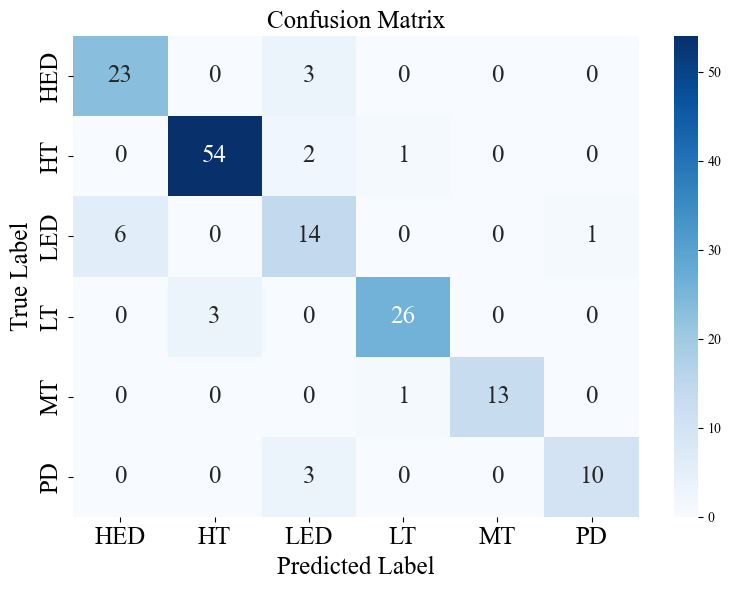

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 标签映射字典
label_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 特征和标签
X_train = all_train_data.drop('act', axis=1)
y_train = all_train_data['act']
X_test = all_test_data.drop('act', axis=1)
y_test = all_test_data['act']

# 模型训练
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 评估
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=[label_mapping[i] for i in sorted(label_mapping.keys())]))

# 混淆矩阵
plt.rcParams["font.family"] = "Times New Roman"

# 获取排序后的标签
class_labels = sorted(model.classes_)  # 确保混淆矩阵按顺序排列
class_names = [label_mapping[i] for i in class_labels]

cm = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 18, "fontname": "Times New Roman"})

plt.xlabel('Predicted Label', fontsize=18, fontname='Times New Roman')
plt.ylabel('True Label', fontsize=18, fontname='Times New Roman')
plt.title('Confusion Matrix', fontsize=18, fontname='Times New Roman')
plt.xticks(fontsize=18, fontname='Times New Roman')
plt.yticks(fontsize=18, fontname='Times New Roman')
plt.tight_layout()
plt.show()



# Gini随机森林 + SMOTE

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE
from collections import OrderedDict

# 特征和标签
X_train = all_train_data.drop('act', axis=1)
y_train = all_train_data['act']
X_test = all_test_data.drop('act', axis=1)
y_test = all_test_data['act']

# 定义随机森林模型
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_test, y_pred, average='macro', zero_division=0)
    }

# 存储结果
results = OrderedDict()

# 原始数据
results['No Oversampling'] = train_and_evaluate(X_train, y_train, X_test, y_test)

# 平衡方法
resamplers = {
    'SMOTE': SMOTE(random_state=42),
    # 'ADASYN': ADASYN(random_state=42),
    # 'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    # 'KMeansSMOTE': KMeansSMOTE(random_state=42)
}

for name, sampler in resamplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    results[name] = train_and_evaluate(X_resampled, y_resampled, X_test, y_test)

# 输出结果
print("\n=== 模型评估结果 ===")
for method, metrics in results.items():
    print(f"\n[{method}]")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



=== 模型评估结果 ===

[No Oversampling]
Accuracy: 0.8750
Precision: 0.8691
Recall: 0.8488
F1: 0.8572

[SMOTE]
Accuracy: 0.8750
Precision: 0.8736
Recall: 0.8603
F1: 0.8654


In [25]:
from sklearn.metrics import classification_report
import pandas as pd

# 标签映射（可选）
label_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}
target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

# 修改 train_and_evaluate 函数，返回分类报告和 overall metrics
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 每类指标
    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)
    
    # 转换为DataFrame方便展示
    report_df = pd.DataFrame(report_dict).transpose()

    return report_df

# 存储结果
results = OrderedDict()
results['No Oversampling'] = train_and_evaluate(X_train, y_train, X_test, y_test)

# 只启用 SMOTE（你可以取消注释其他方法）
resamplers = {
    'SMOTE': SMOTE(random_state=42),
    # 'ADASYN': ADASYN(random_state=42),
    # 'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    # 'KMeansSMOTE': KMeansSMOTE(random_state=42)
}

for name, sampler in resamplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    results[name] = train_and_evaluate(X_resampled, y_resampled, X_test, y_test)

# 输出结果
print("\n=== 每类指标报告 ===")
for method, report_df in results.items():
    print(f"\n[{method}]")
    print(report_df.loc[target_names][['precision', 'recall', 'f1-score']].round(4))



=== 每类指标报告 ===

[No Oversampling]
     precision  recall  f1-score
HED     0.7931  0.8846    0.8364
HT      0.9474  0.9474    0.9474
LED     0.6364  0.6667    0.6512
LT      0.9286  0.8966    0.9123
MT      1.0000  0.9286    0.9630
PD      0.9091  0.7692    0.8333

[SMOTE]
     precision  recall  f1-score
HED     0.7857  0.8462    0.8148
HT      0.9464  0.9298    0.9381
LED     0.6522  0.7143    0.6818
LT      0.9286  0.8966    0.9123
MT      0.9286  0.9286    0.9286
PD      1.0000  0.8462    0.9167


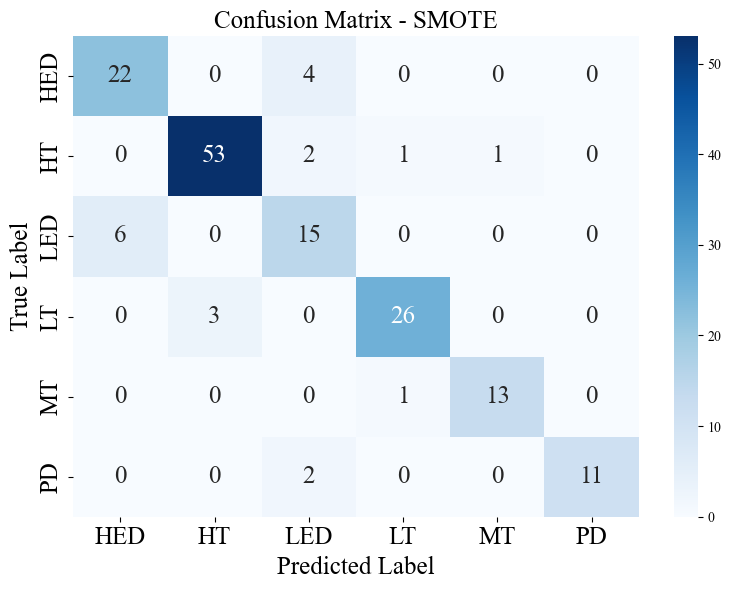


=== 模型评估结果 ===

[No Oversampling]
Accuracy: 0.8750
Precision: 0.8691
Recall: 0.8488
F1: 0.8572

[SMOTE]
Accuracy: 0.8750
Precision: 0.8736
Recall: 0.8603
F1: 0.8654


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns

# 标签映射
label_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 特征和标签
X_train = all_train_data.drop('act', axis=1)
y_train = all_train_data['act']
X_test = all_test_data.drop('act', axis=1)
y_test = all_test_data['act']

# 定义随机森林模型
def train_and_evaluate(X_train, y_train, X_test, y_test, return_pred=False):
    model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_test, y_pred, average='macro', zero_division=0)
    }
    if return_pred:
        return metrics, y_pred, model
    else:
        return metrics

# 存储结果
results = OrderedDict()

# 原始数据
results['No Oversampling'] = train_and_evaluate(X_train, y_train, X_test, y_test)

# SMOTE处理并记录混淆矩阵
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
smote_metrics, smote_pred, smote_model = train_and_evaluate(X_smote, y_smote, X_test, y_test, return_pred=True)
results['SMOTE'] = smote_metrics

# 设置全局字体
plt.rcParams["font.family"] = "Times New Roman"

# 混淆矩阵（带标签映射）
class_labels = sorted(smote_model.classes_)
class_names = [label_mapping[i] for i in class_labels]

cm = confusion_matrix(y_test, smote_pred, labels=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 18, "fontname": "Times New Roman"})

plt.xlabel('Predicted Label', fontsize=18, fontname='Times New Roman')
plt.ylabel('True Label', fontsize=18, fontname='Times New Roman')
plt.title('Confusion Matrix - SMOTE', fontsize=18, fontname='Times New Roman')
plt.xticks(fontsize=18, fontname='Times New Roman')
plt.yticks(fontsize=18, fontname='Times New Roman')
plt.tight_layout()
plt.show()

# 输出结果
print("\n=== 模型评估结果 ===")
for method, metrics in results.items():
    print(f"\n[{method}]") 
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


# Gini随机森林 + SMOTE + PSO

In [12]:
Duval_test_data = test_Duval
y_test = Duval_test_data['act']

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from pyswarm import pso

# 准备训练集和测试集
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

# 应用 SMOTE 进行过采样
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ====================================
# 评价函数（目标是最小化 -f1_macro）
# ====================================
def rf_pso_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

# 参数边界
lb = [50, 5]     # 最小值：n_estimators, max_depth
ub = [200, 100]   # 最大值：n_estimators, max_depth

# 执行 PSO 寻优
best_params, _ = pso(rf_pso_objective, lb, ub, swarmsize=10, maxiter=20)
n_estimators_opt = int(best_params[0])
max_depth_opt = int(best_params[1])

# ====================================
# 使用最佳参数训练模型并测试
# ====================================
model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# ====================================
# 输出评估指标
# ====================================
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

results_pso = evaluate_model(y_test, y_pred)

# 打印结果
print(f"\n=== SMOTE + PSO优化后的随机森林模型 ===")
print(f"最优 n_estimators: {n_estimators_opt}, max_depth: {max_depth_opt}")
for k, v in results_pso.items():
    print(f"{k}: {v:.4f}")


Stopping search: maximum iterations reached --> 20

=== SMOTE + PSO优化后的随机森林模型 ===
最优 n_estimators: 82, max_depth: 16
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081


# Gini随机森林 + SMOTE + GA

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from deap import base, creator, tools, algorithms
import random
import warnings

warnings.filterwarnings("ignore")

# 准备训练集和测试集
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

# 应用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ========================
# 评价函数（目标最大化 F1）
# ========================
def eval_rf(individual):
    n_estimators = int(individual[0])
    max_depth = int(individual[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return (scores.mean(),)

# 定义 GA 参数空间
N_ESTIMATORS_MIN = 50
N_ESTIMATORS_MAX = 200
MAX_DEPTH_MIN = 5
MAX_DEPTH_MAX = 100

# 创建遗传算法工具
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("n_estimators", random.randint, N_ESTIMATORS_MIN, N_ESTIMATORS_MAX)
toolbox.register("max_depth", random.randint, MAX_DEPTH_MIN, MAX_DEPTH_MAX)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_rf)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[N_ESTIMATORS_MIN, MAX_DEPTH_MIN],
                 up=[N_ESTIMATORS_MAX, MAX_DEPTH_MAX], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行 GA 优化
population = toolbox.population(n=20)
hof = tools.HallOfFame(1)  # 保留最优解
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.3, ngen=20, halloffame=hof, verbose=False)

# 提取最优参数
best_ind = hof[0]
n_estimators_opt = int(best_ind[0])
max_depth_opt = int(best_ind[1])

# ========================
# 使用最佳参数训练模型
# ========================
model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# ========================
# 评估函数
# ========================
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

results_ga = evaluate_model(y_test, y_pred)

# 打印结果
print(f"\n=== SMOTE + GA优化后的随机森林模型 ===")
print(f"最优 n_estimators: {n_estimators_opt}, max_depth: {max_depth_opt}")
for k, v in results_ga.items():
    print(f"{k}: {v:.4f}")



=== SMOTE + GA优化后的随机森林模型 ===
最优 n_estimators: 112, max_depth: 49
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081


# Gini随机森林 + SMOTE + SA

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import random
import math
import warnings

warnings.filterwarnings("ignore")

# ===============================
# 准备数据 + SMOTE 过采样
# ===============================
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ===============================
# SA 搜索的评价函数（目标最大化 F1）
# ===============================
def evaluate_model_f1(n_estimators, max_depth):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        random_state=42
    )
    score = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return score.mean()

# ===============================
# 模拟退火主函数
# ===============================
def simulated_annealing(initial_solution, T_start=100, T_end=1, alpha=0.9, max_iter=50):
    current_solution = initial_solution
    current_score = evaluate_model_f1(*current_solution)
    best_solution = current_solution
    best_score = current_score
    T = T_start

    while T > T_end:
        for _ in range(max_iter):
            # 生成新解（局部扰动）
            new_solution = [
                np.clip(current_solution[0] + random.randint(-10, 10), 50, 200),
                np.clip(current_solution[1] + random.randint(-5, 5), 5, 100)
            ]
            new_score = evaluate_model_f1(*new_solution)

            delta = new_score - current_score
            # 接受准则：变好 or 概率接受变差
            if delta > 0 or random.random() < math.exp(delta / T):
                current_solution = new_solution
                current_score = new_score
                if new_score > best_score:
                    best_solution = new_solution
                    best_score = new_score
        T *= alpha  # 降温

    return best_solution, best_score

# ===============================
# 执行 SA 优化
# ===============================
initial = [100, 20]  # 初始解：[n_estimators, max_depth]
best_params, best_f1 = simulated_annealing(initial)
n_estimators_opt = int(best_params[0])
max_depth_opt = int(best_params[1])

# ===============================
# 使用最佳参数训练并评估模型
# ===============================
model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

results_sa = evaluate_model(y_test, y_pred)

# 输出最终结果
print(f"\n=== SMOTE + SA优化后的随机森林模型 ===")
print(f"最优 n_estimators: {n_estimators_opt}, max_depth: {max_depth_opt}")
for k, v in results_sa.items():
    print(f"{k}: {v:.4f}")



=== SMOTE + SA优化后的随机森林模型 ===
最优 n_estimators: 118, max_depth: 16
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081


# Gini随机森林 + SMOTE + DE

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from scipy.optimize import differential_evolution
import warnings

warnings.filterwarnings("ignore")

# ===============================
# 数据准备 + SMOTE 过采样
# ===============================
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ===============================
# 差分进化优化目标函数（最大化 F1）
# ===============================
def rf_de_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()  # DE 是最小化，所以取负值

# 参数范围（边界）
bounds = [(50, 200),  # n_estimators
          (5, 100)]   # max_depth

# ===============================
# 执行差分进化
# ===============================
result = differential_evolution(rf_de_objective, bounds, strategy='best1bin',
                                maxiter=20, popsize=15, tol=0.01, seed=42)

n_estimators_opt = int(result.x[0])
max_depth_opt = int(result.x[1])

# ===============================
# 训练最终模型
# ===============================
model = RandomForestClassifier(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# ===============================
# 模型评估
# ===============================
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

results_de = evaluate_model(y_test, y_pred)

# ===============================
# 输出结果
# ===============================
print(f"\n=== SMOTE + 差分进化优化后的随机森林模型 ===")
print(f"最优 n_estimators: {n_estimators_opt}, max_depth: {max_depth_opt}")
for k, v in results_de.items():
    print(f"{k}: {v:.4f}")



=== SMOTE + 差分进化优化后的随机森林模型 ===
最优 n_estimators: 112, max_depth: 93
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081


# 消融实验

Stopping search: maximum iterations reached --> 10
 The best solution found:                                                                           
 [126.  40.]

 Objective function:
 -0.9016108244668041


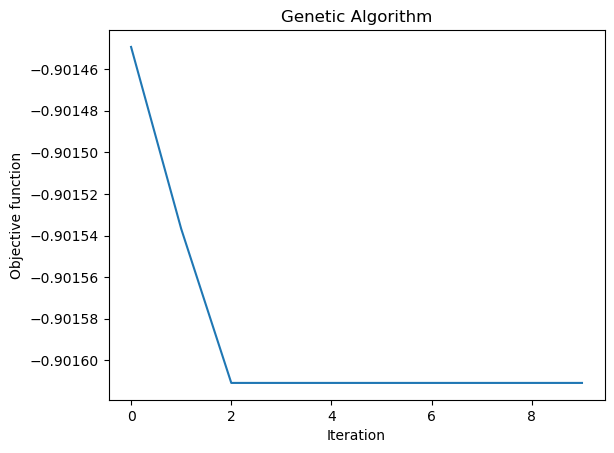


=== 各方法性能指标对比 ===

[Base]
Accuracy: 0.8938
Precision: 0.8852
Recall: 0.8802
F1: 0.8812
AUC: 0.9812

[SMOTE]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9767

[SMOTE+PSO]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9762

[SMOTE+GA]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9763

[SMOTE+DE]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9762


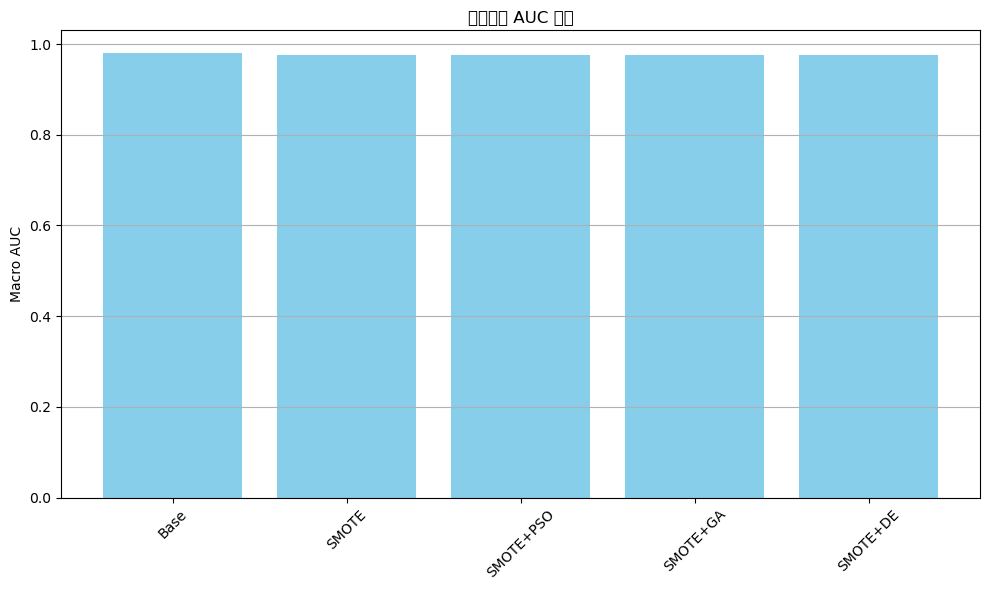

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from pyswarm import pso
from geneticalgorithm import geneticalgorithm as ga
from scipy.optimize import differential_evolution
import warnings

warnings.filterwarnings("ignore")

# ===============================
# 数据准备 + SMOTE 过采样
# ===============================
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

classes = sorted(y_train.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# ===============================
# 模型评估函数
# ===============================
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'AUC': roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
    }, y_proba

results = {}
probas = {}

# 1. 基线模型（无重采样）
model_base = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
results['Base'], probas['Base'] = evaluate_model(model_base, X_train, y_train, X_test, y_test)

# 2. SMOTE + RF
model_smote = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
results['SMOTE'], probas['SMOTE'] = evaluate_model(model_smote, X_resampled, y_resampled, X_test, y_test)

# 3. PSO 优化

def rf_pso_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

lb, ub = [50, 5], [200, 100]
best_params_pso, _ = pso(rf_pso_objective, lb, ub, swarmsize=10, maxiter=10)
model_pso = RandomForestClassifier(n_estimators=int(best_params_pso[0]), max_depth=int(best_params_pso[1]), random_state=42)
results['SMOTE+PSO'], probas['SMOTE+PSO'] = evaluate_model(model_pso, X_resampled, y_resampled, X_test, y_test)

# 4. GA 优化

def rf_ga_objective(X):
    n_estimators = int(X[0])
    max_depth = int(X[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

varbound = np.array([[50, 200], [5, 100]])
algorithm_param = {'max_num_iteration': 10, 'population_size': 10, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 5}
model_ga = ga(function=rf_ga_objective, dimension=2, variable_type='int', variable_boundaries=varbound,
              algorithm_parameters=algorithm_param)
model_ga.run()
ga_params = model_ga.output_dict['variable']
model_ga_rf = RandomForestClassifier(n_estimators=int(ga_params[0]), max_depth=int(ga_params[1]), random_state=42)
results['SMOTE+GA'], probas['SMOTE+GA'] = evaluate_model(model_ga_rf, X_resampled, y_resampled, X_test, y_test)

# 5. DE 优化

def rf_de_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

bounds = [(50, 200), (5, 100)]
result_de = differential_evolution(rf_de_objective, bounds, strategy='best1bin', maxiter=10, popsize=10, seed=42)
model_de = RandomForestClassifier(n_estimators=int(result_de.x[0]), max_depth=int(result_de.x[1]), random_state=42)
results['SMOTE+DE'], probas['SMOTE+DE'] = evaluate_model(model_de, X_resampled, y_resampled, X_test, y_test)

# ===============================
# 输出评估指标结果
# ===============================
print("\n=== 各方法性能指标对比 ===")
for name, metrics in results.items():
    print(f"\n[{name}]")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

# ===============================
# 绘制各方法 AUC 对比图
# ===============================
plt.figure(figsize=(10, 6))
method_names = list(results.keys())
auc_scores = [results[m]['AUC'] for m in method_names]
plt.bar(method_names, auc_scores, color='skyblue')
plt.ylabel('Macro AUC')
plt.title('各方法的 AUC 对比')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Stopping search: maximum iterations reached --> 10
 The best solution found:                                                                           
 [146.  77.]

 Objective function:
 -0.9027786214047886


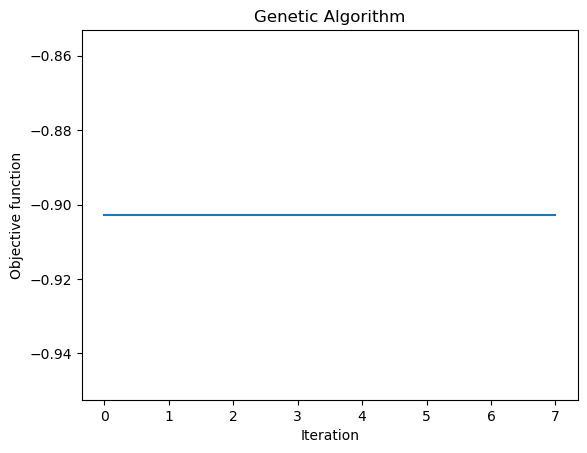


=== 各方法性能指标对比 ===

[Base]
Accuracy: 0.8938
Precision: 0.8852
Recall: 0.8802
F1: 0.8812
AUC: 0.9812

[SMOTE]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9767

[SMOTE+PSO]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9772

[SMOTE+GA]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9768

[SMOTE+DE]
Accuracy: 0.9125
Precision: 0.9188
Recall: 0.9018
F1: 0.9081
AUC: 0.9762

=== 各方法各类别详细评估 ===

[Base 分类报告]
类别 1: 精确率=0.7857, 召回率=0.8462, F1=0.8148
类别 2: 精确率=0.9483, 召回率=0.9649, F1=0.9565
类别 3: 精确率=0.7273, 召回率=0.7619, F1=0.7442
类别 4: 精确率=1.0000, 召回率=0.8621, F1=0.9259
类别 5: 精确率=0.9333, 召回率=1.0000, F1=0.9655
类别 6: 精确率=0.9167, 召回率=0.8462, F1=0.8800

[SMOTE 分类报告]
类别 1: 精确率=0.8148, 召回率=0.8462, F1=0.8302
类别 2: 精确率=0.9483, 召回率=0.9649, F1=0.9565
类别 3: 精确率=0.7500, 召回率=0.8571, F1=0.8000
类别 4: 精确率=1.0000, 召回率=0.8966, F1=0.9455
类别 5: 精确率=1.0000, 召回率=1.0000, F1=1.0000
类别 6: 精确率=1.0000, 召回率=0.8462, F1=0.9167

[SMOTE+PSO 分类报告]
类别 1: 精确率=0.8148,

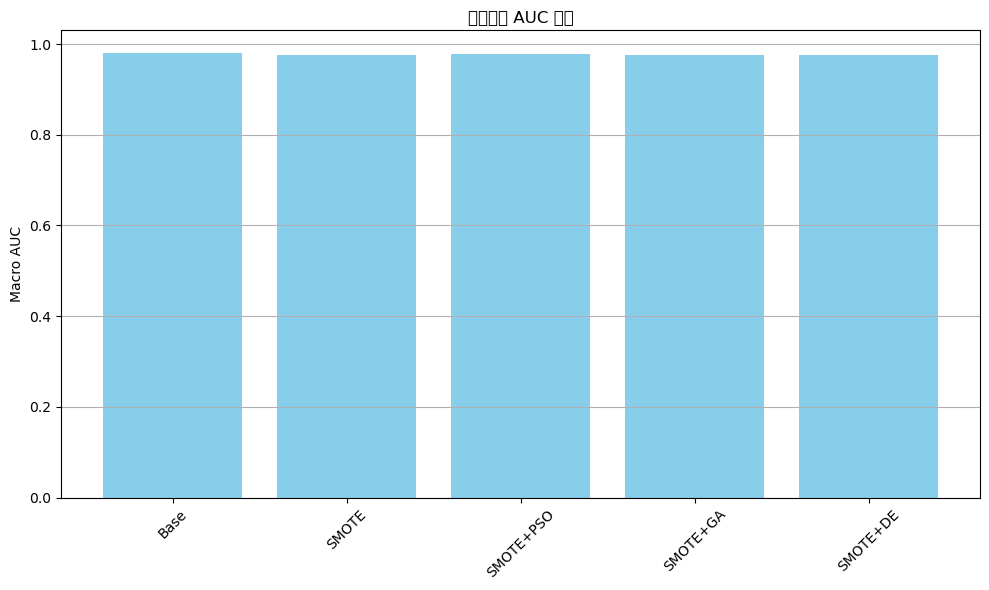

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from pyswarm import pso
from geneticalgorithm import geneticalgorithm as ga
from scipy.optimize import differential_evolution
import warnings

warnings.filterwarnings("ignore")

# ===============================
# 数据准备 + SMOTE 过采样
# ===============================
X_train = Duval_train_data.drop('act', axis=1)
y_train = Duval_train_data['act']
X_test = Duval_test_data.drop('act', axis=1)
y_test = Duval_test_data['act']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

classes = sorted(y_train.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# ===============================
# 模型评估函数
# ===============================
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'AUC': roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr'),
        'Report': classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    }
    return metrics, y_proba

results = {}
probas = {}

# 1. 基线模型（无重采样）
model_base = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
results['Base'], probas['Base'] = evaluate_model(model_base, X_train, y_train, X_test, y_test)

# 2. SMOTE + RF
model_smote = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
results['SMOTE'], probas['SMOTE'] = evaluate_model(model_smote, X_resampled, y_resampled, X_test, y_test)

# 3. PSO 优化

def rf_pso_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

lb, ub = [50, 5], [200, 100]
best_params_pso, _ = pso(rf_pso_objective, lb, ub, swarmsize=10, maxiter=10)
model_pso = RandomForestClassifier(n_estimators=int(best_params_pso[0]), max_depth=int(best_params_pso[1]), random_state=42)
results['SMOTE+PSO'], probas['SMOTE+PSO'] = evaluate_model(model_pso, X_resampled, y_resampled, X_test, y_test)

# 4. GA 优化

def rf_ga_objective(X):
    n_estimators = int(X[0])
    max_depth = int(X[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

varbound = np.array([[50, 200], [5, 100]])
algorithm_param = {'max_num_iteration': 10, 'population_size': 10, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 5}
model_ga = ga(function=rf_ga_objective, dimension=2, variable_type='int', variable_boundaries=varbound,
              algorithm_parameters=algorithm_param)
model_ga.run()
ga_params = model_ga.output_dict['variable']
model_ga_rf = RandomForestClassifier(n_estimators=int(ga_params[0]), max_depth=int(ga_params[1]), random_state=42)
results['SMOTE+GA'], probas['SMOTE+GA'] = evaluate_model(model_ga_rf, X_resampled, y_resampled, X_test, y_test)

# 5. DE 优化

def rf_de_objective(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='f1_macro')
    return -scores.mean()

bounds = [(50, 200), (5, 100)]
result_de = differential_evolution(rf_de_objective, bounds, strategy='best1bin', maxiter=10, popsize=10, seed=42)
model_de = RandomForestClassifier(n_estimators=int(result_de.x[0]), max_depth=int(result_de.x[1]), random_state=42)
results['SMOTE+DE'], probas['SMOTE+DE'] = evaluate_model(model_de, X_resampled, y_resampled, X_test, y_test)

# ===============================
# 输出评估指标结果
# ===============================
print("\n=== 各方法性能指标对比 ===")
for name, metrics in results.items():
    print(f"\n[{name}]")
    for k, v in metrics.items():
        if k != 'Report':
            print(f"{k}: {v:.4f}")

# ===============================
# 显示各类别的详细指标
# ===============================
print("\n=== 各方法各类别详细评估 ===")
for name, metrics in results.items():
    print(f"\n[{name} 分类报告]")
    report = metrics['Report']
    for cls in classes:
        cls_str = str(cls)
        if cls_str in report:
            print(f"类别 {cls_str}: 精确率={report[cls_str]['precision']:.4f}, 召回率={report[cls_str]['recall']:.4f}, F1={report[cls_str]['f1-score']:.4f}")

# ===============================
# 绘制各方法 AUC 对比图
# ===============================
plt.figure(figsize=(10, 6))
method_names = list(results.keys())
auc_scores = [results[m]['AUC'] for m in method_names]
plt.bar(method_names, auc_scores, color='skyblue')
plt.ylabel('Macro AUC')
plt.title('各方法的 AUC 对比')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Gini随机森林 + SMOTE + SHAP

In [105]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 特征和标签
X_train = all_train_data.drop('act', axis=1)
y_train = all_train_data['act']
X_test = all_test_data.drop('act', axis=1)
y_test = all_test_data['act']

# 应用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 训练模型
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
model.fit(X_resampled, y_resampled)

# 模型预测并评估
y_pred = model.predict(X_test)
print("\n=== SMOTE + RandomForest 模型评估结果 ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

# ===== SHAP 分析 =====
print("\n正在进行 SHAP 分析...")

# 创建 TreeExplainer
explainer = shap.TreeExplainer(model)
# 计算 SHAP 值（只对测试集前100个样本分析）
shap_values = explainer.shap_values(X_test)



=== SMOTE + RandomForest 模型评估结果 ===
Accuracy: 0.8938
Precision: 0.8933
Recall: 0.8865
F1 Score: 0.8880

正在进行 SHAP 分析...


# 汇总图

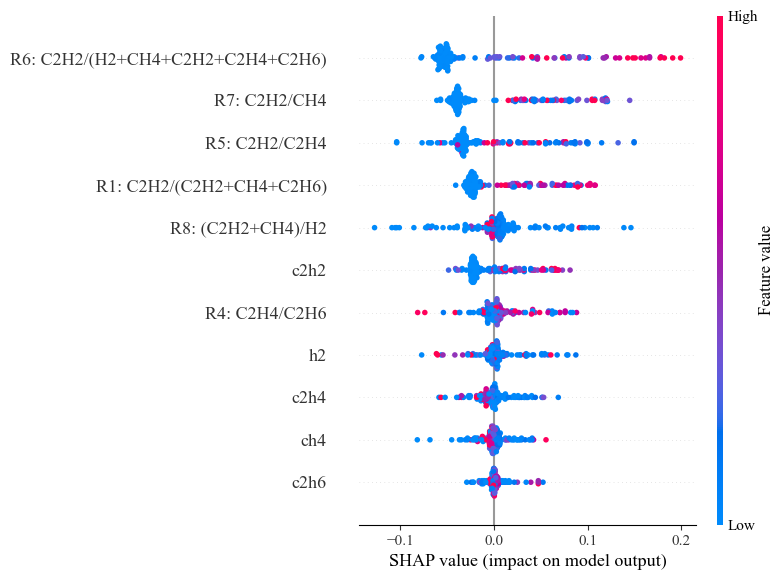

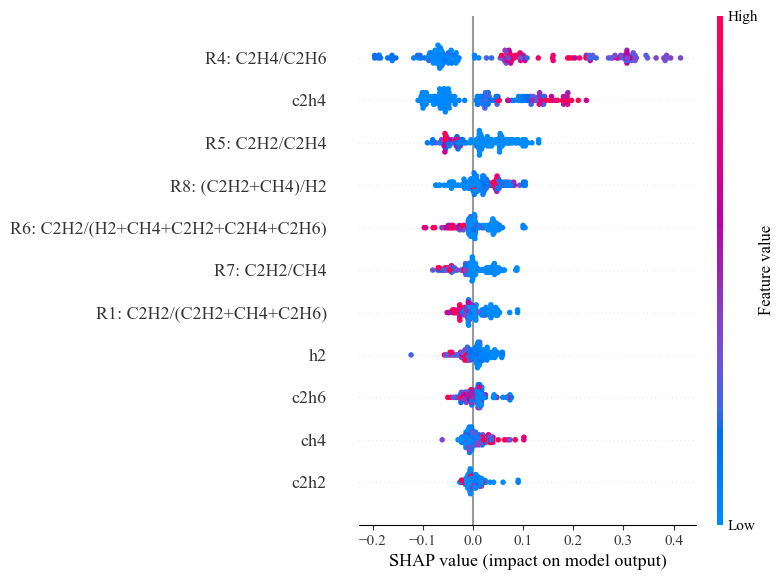

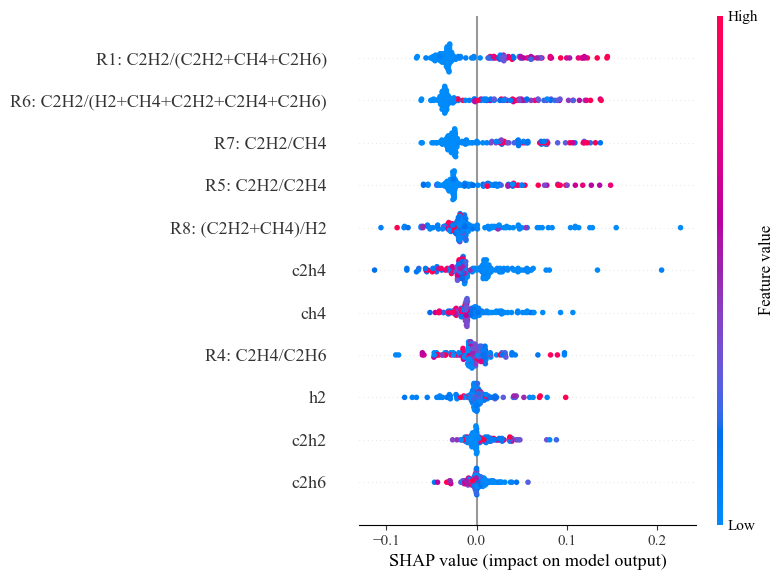

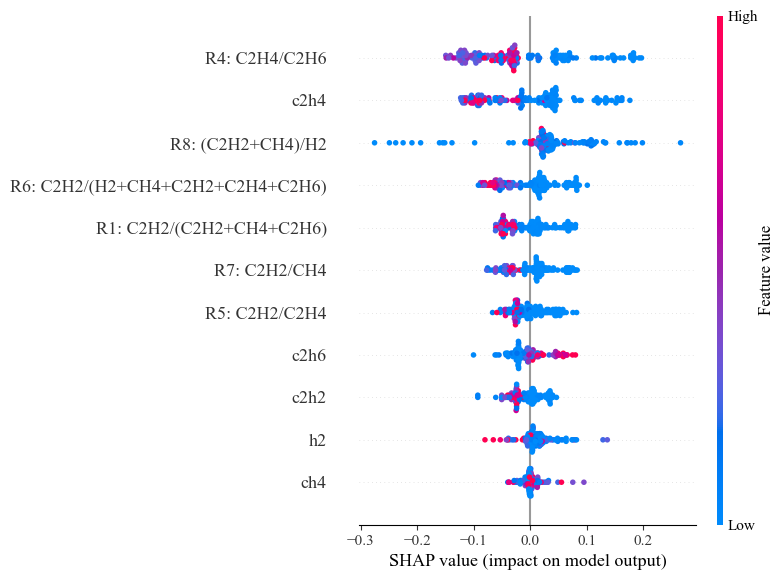

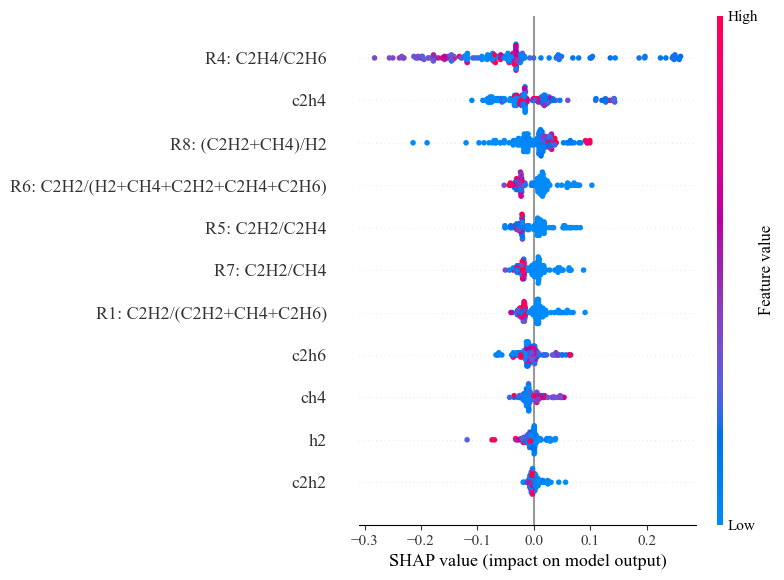

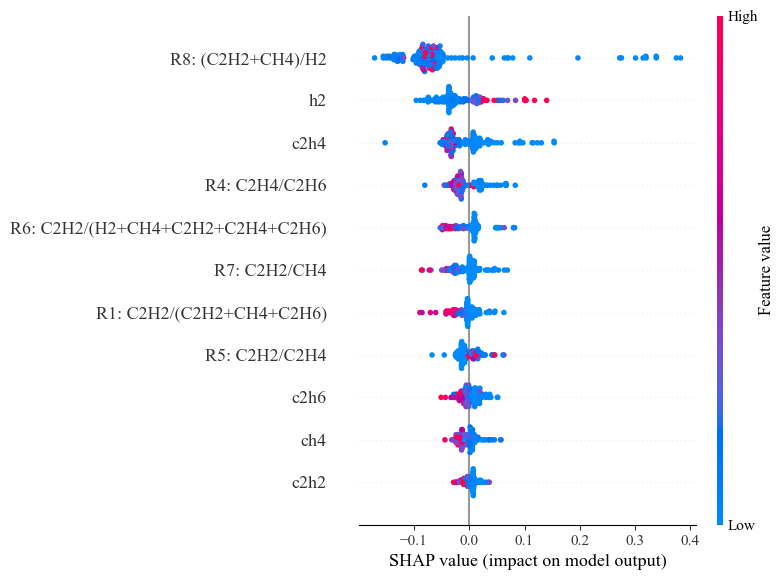

In [106]:
import shap
import matplotlib.pyplot as plt

# 假设 final_model, X_test, shap_values 已定义

for i, class_name in enumerate(model.classes_):
    #plt.title(f"SHAP Summary Plot for Class {class_name}", fontsize=15)
    shap.summary_plot(shap_values[:, :, i], X_test, class_names=[class_name], title=f"SHAP Summary Plot for Class {class_name}")
    
    plt.show()

# 条形图

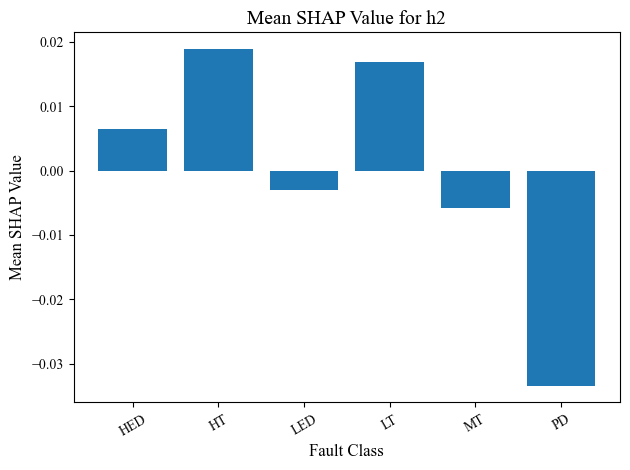

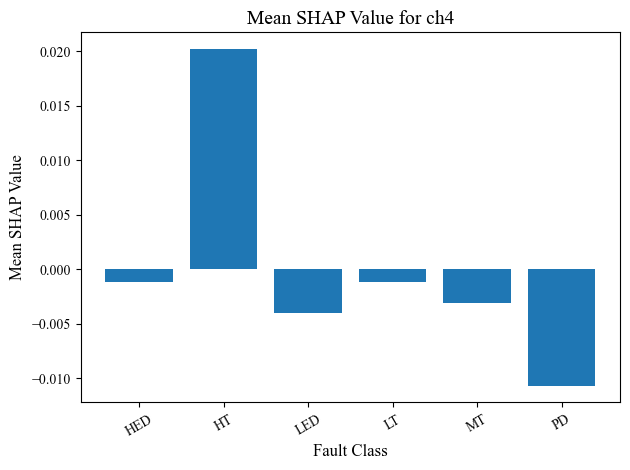

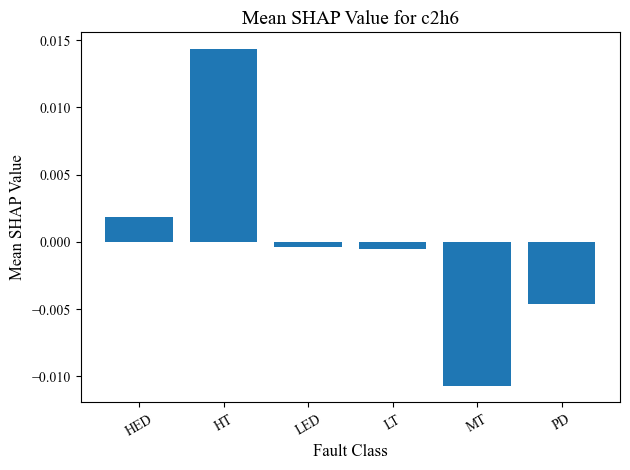

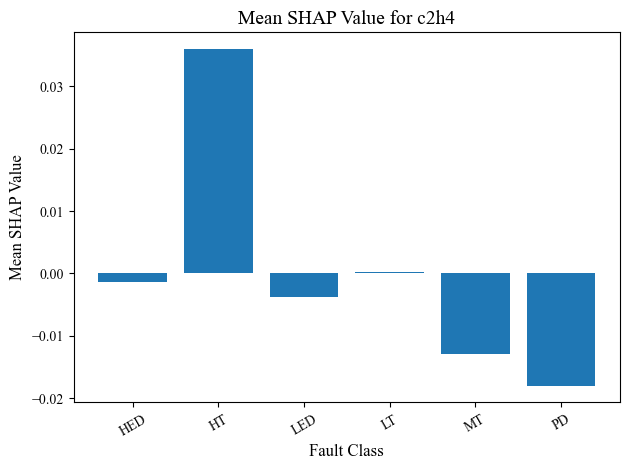

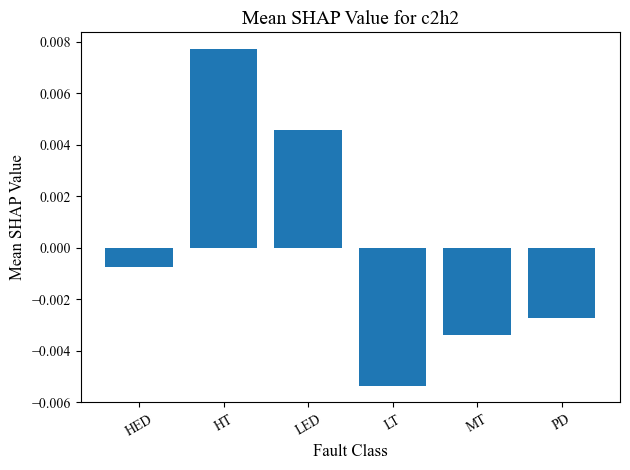

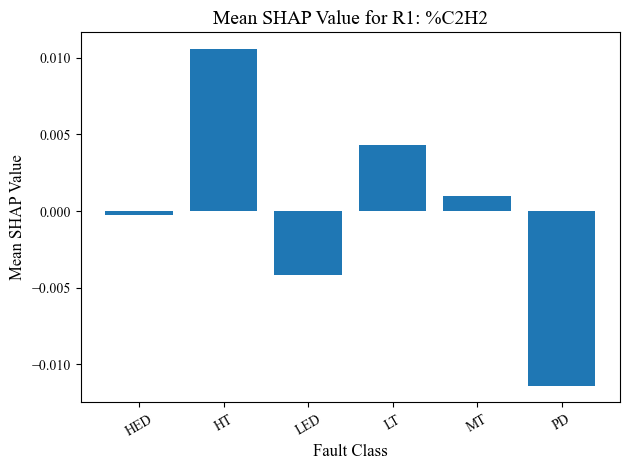

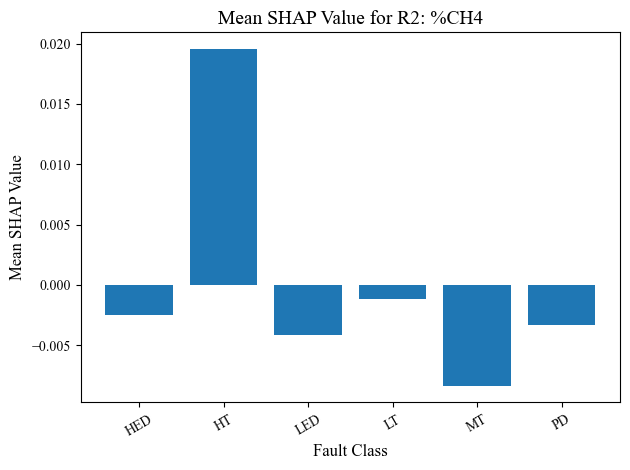

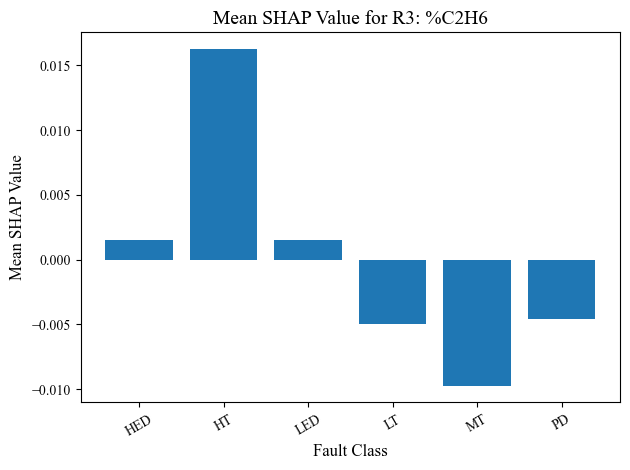

In [41]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# 类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 假设 final_model, X_test, shap_values 已定义

for feature_name in X_test.columns:
    feature_index = X_test.columns.get_loc(feature_name)
    mean_shap_values = shap_values[:, feature_index, :].mean(axis=0)

    # 使用映射后的类别名作为横坐标标签
    class_labels = [category_mapping[cls] for cls in model.classes_]

    plt.figure()
    plt.bar(class_labels, mean_shap_values)
    plt.xlabel("Fault Class", fontsize=12)
    plt.ylabel("Mean SHAP Value", fontsize=12)
    plt.title(f"Mean SHAP Value for {feature_name}", fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


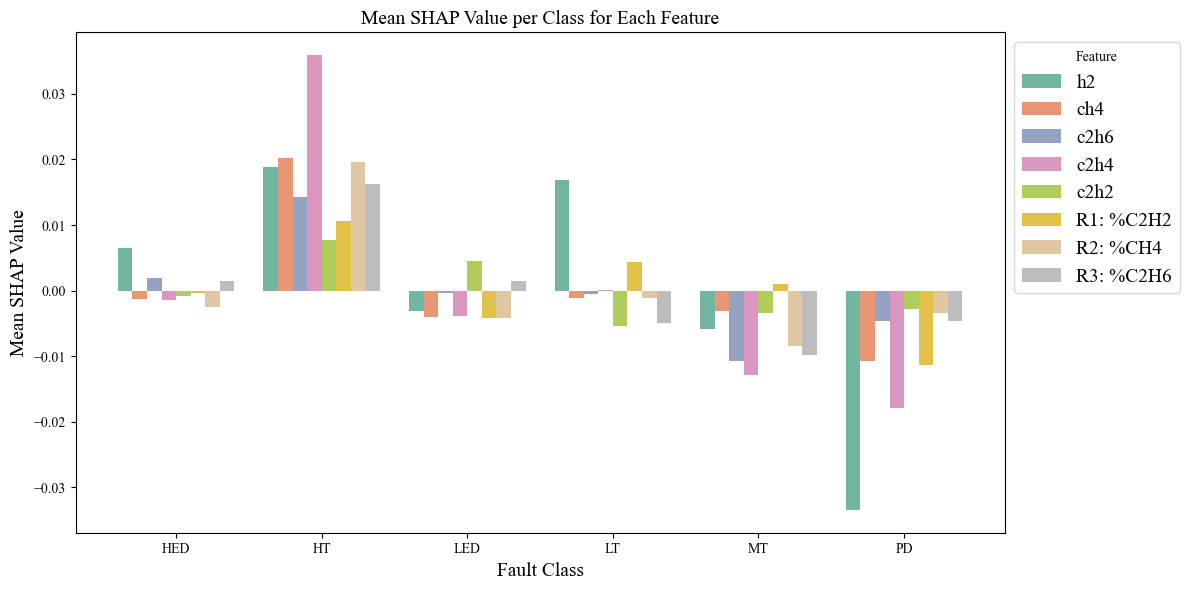

In [49]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 颜色列表
model_colors = [
    '#72b6a1', '#e99675', '#95a3c3', '#db96c0',
    '#b0cc5a', '#e2c148', '#dfc7a3', '#bdbdbd'
]

# 获取类别标签
class_labels = [category_mapping[cls] for cls in model.classes_]

# 特征名
feature_names = X_test.columns.tolist()
num_features = len(feature_names)
num_classes = len(model.classes_)

# 创建平均 SHAP 值矩阵：shape = [num_features, num_classes]
mean_shap_matrix = np.zeros((num_features, num_classes))
for i, feature_name in enumerate(feature_names):
    feature_index = X_test.columns.get_loc(feature_name)
    mean_shap_matrix[i] = shap_values[:, feature_index, :].mean(axis=0)

# 绘图
x = np.arange(num_classes)  # 类别数
bar_width = 0.1  # 条形宽度

plt.figure(figsize=(12, 6))
for i in range(num_features):
    plt.bar(x + i * bar_width, mean_shap_matrix[i],
            width=bar_width,
            color=model_colors[i % len(model_colors)],
            label=feature_names[i])

# 坐标设置
plt.xticks(x + bar_width * (num_features - 1) / 2, class_labels)
plt.xlabel("Fault Class", fontsize=14)
plt.ylabel("Mean SHAP Value", fontsize=14)
plt.title("Mean SHAP Value per Class for Each Feature", fontsize=14)
plt.legend(title="Feature", bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()


# 力图

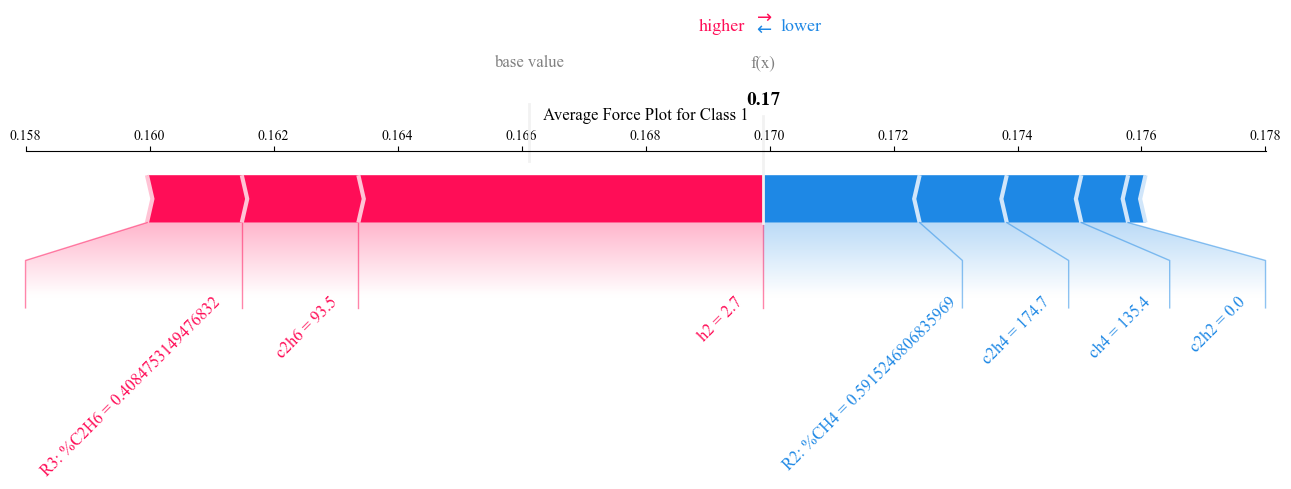

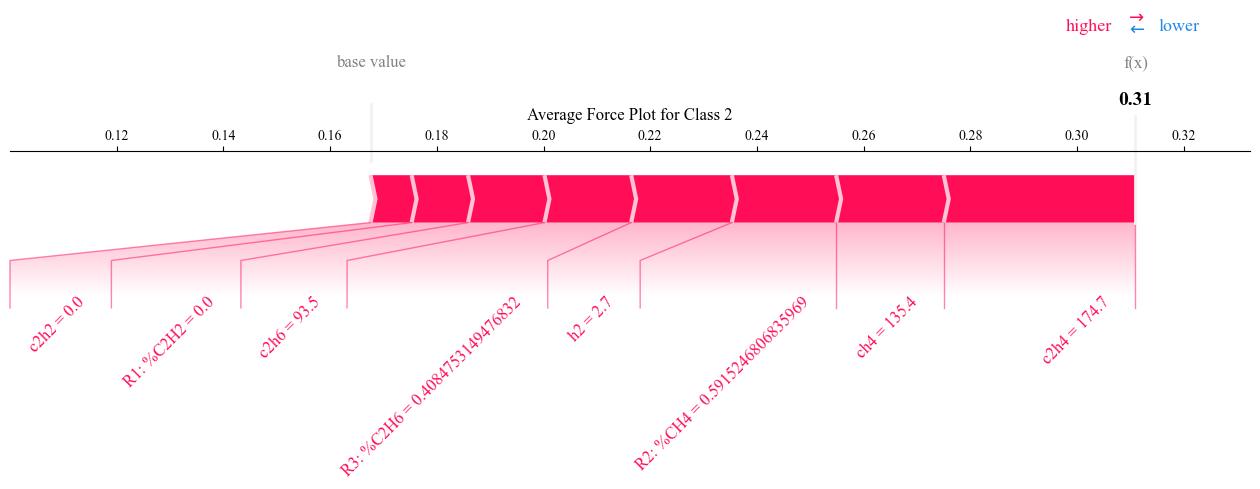

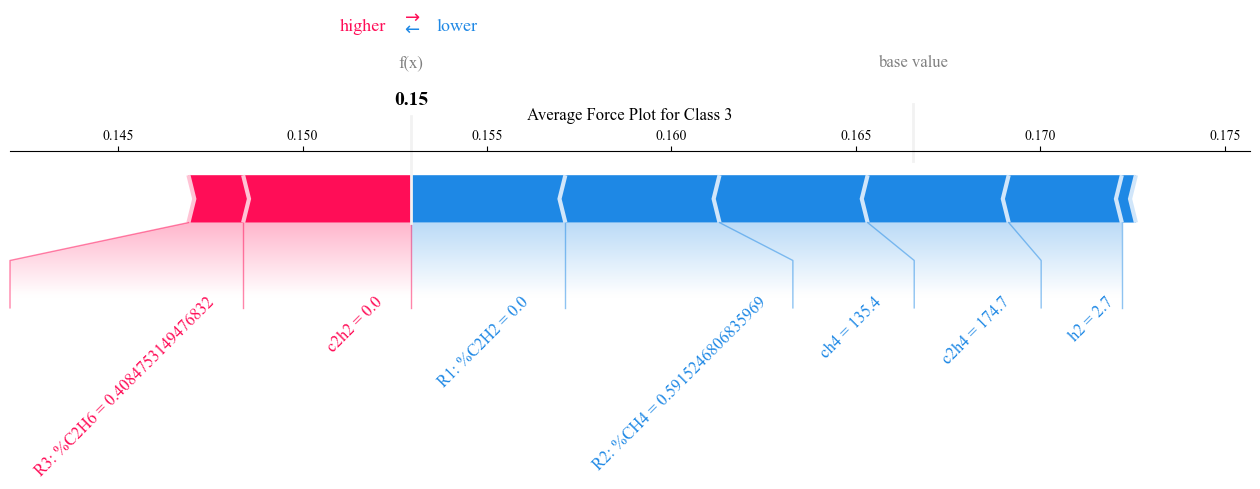

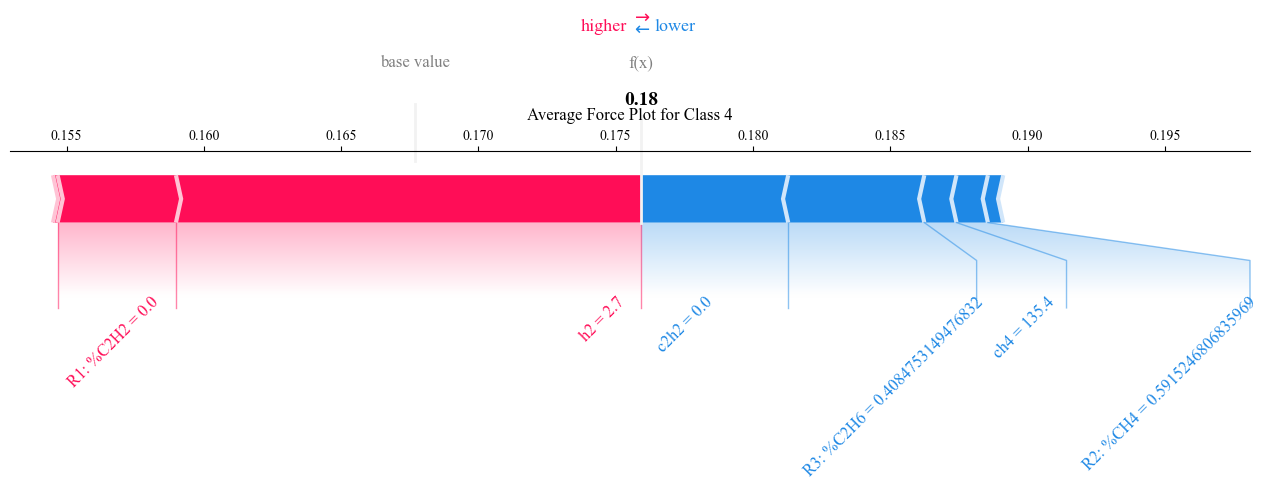

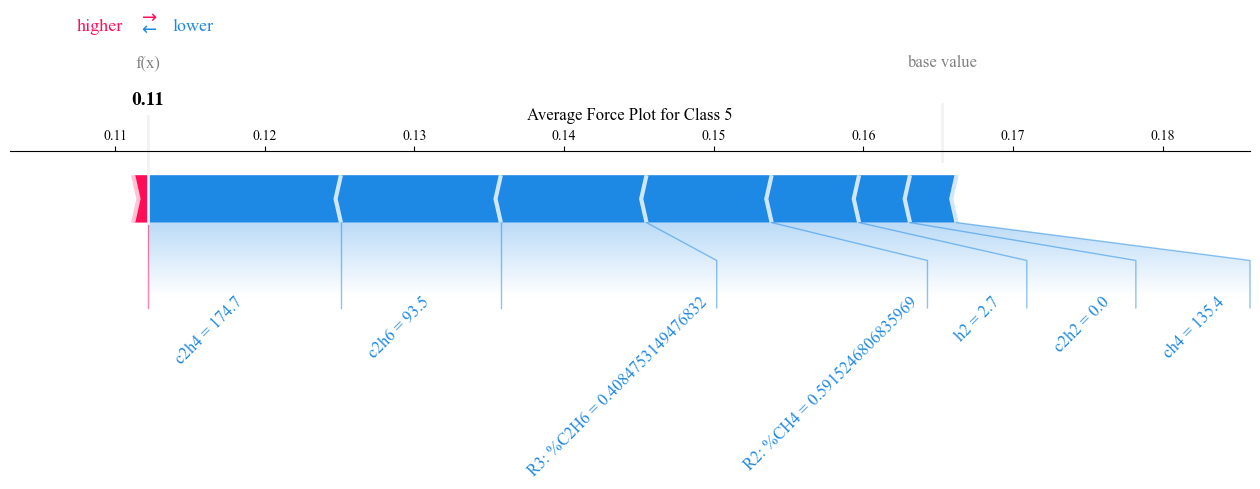

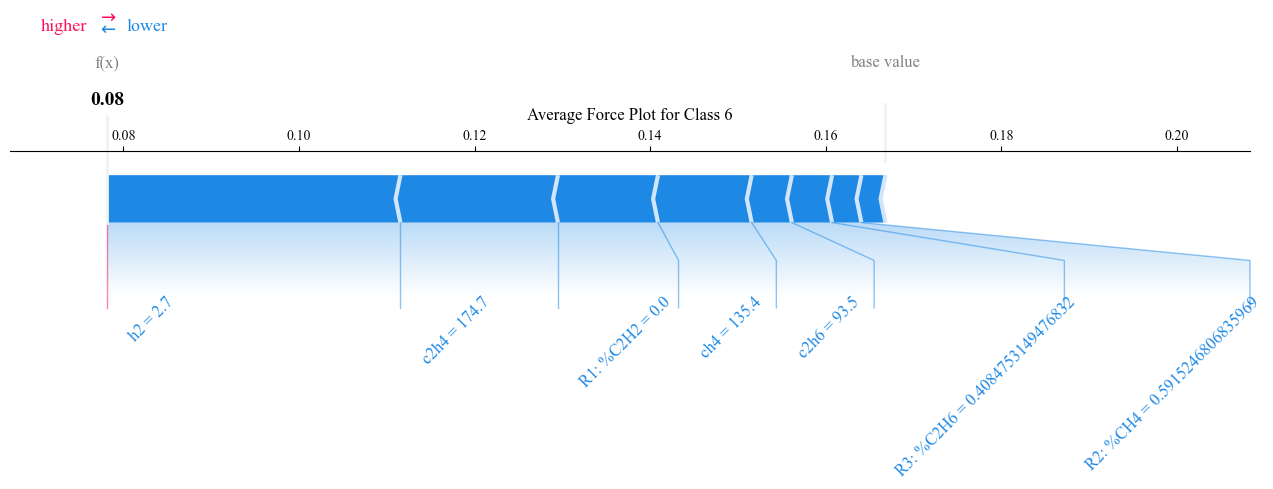

In [51]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 假设 final_model, X_test, shap_values 已定义

for j, class_name in enumerate(model.classes_):
    # 计算每个类别的平均 SHAP 值
    mean_shap_values = np.mean(shap_values[:, :, j], axis=0)

    # 计算该类别所有样本的平均预测值
    mean_expected_value = np.mean(explainer.expected_value[j])

    # 使用 shap.force_plot 可视化平均 SHAP 值
    shap.force_plot(
        mean_expected_value,  # 使用平均期望值
        mean_shap_values,  # 使用平均 SHAP 值
        X_test.iloc[0, :],  # 使用第一个样本的特征值（仅用于显示特征名称）
        matplotlib=True,
        show=False,
        text_rotation=45,
        figsize=(16, 4),
    )
    plt.title(f"Average Force Plot for Class {class_name}")
    plt.show()

# 依赖图 dependence_plot

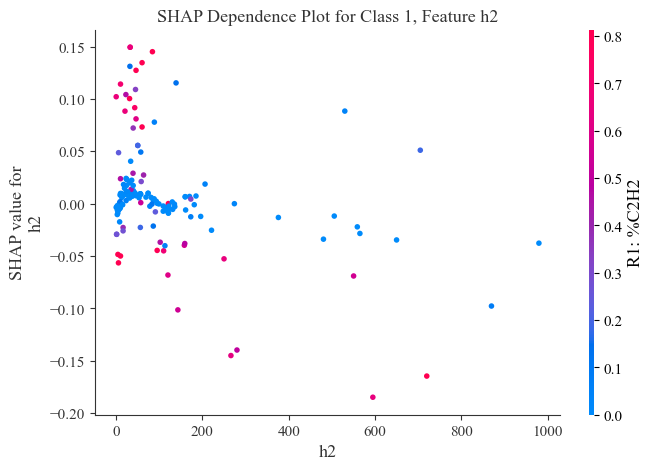

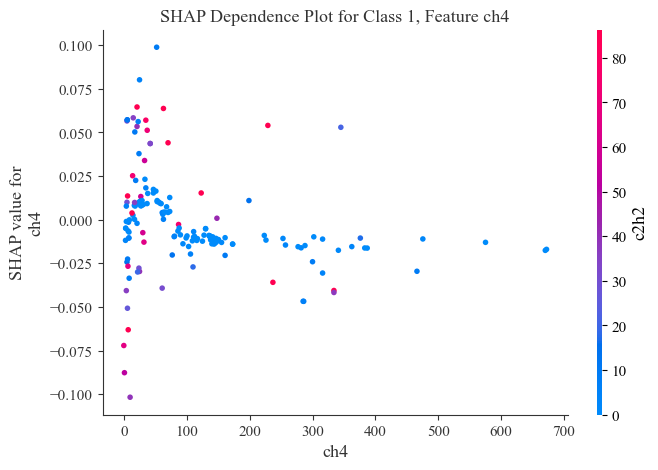

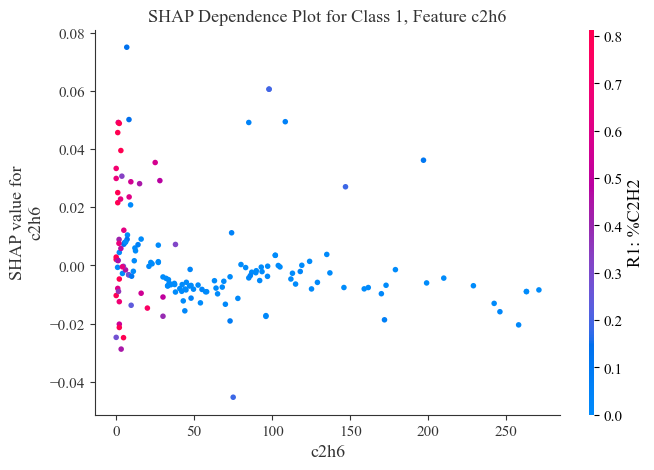

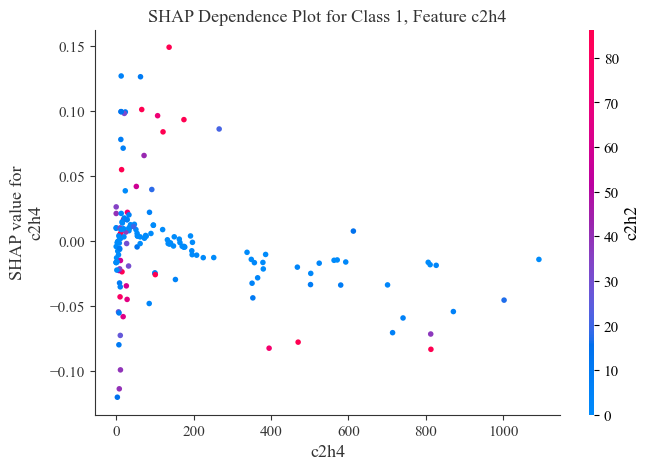

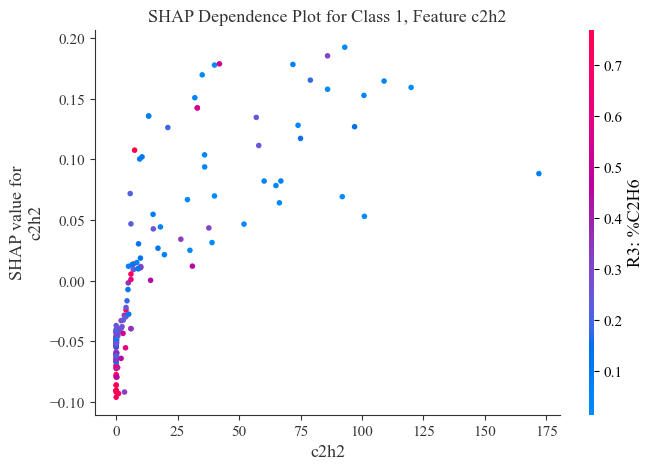

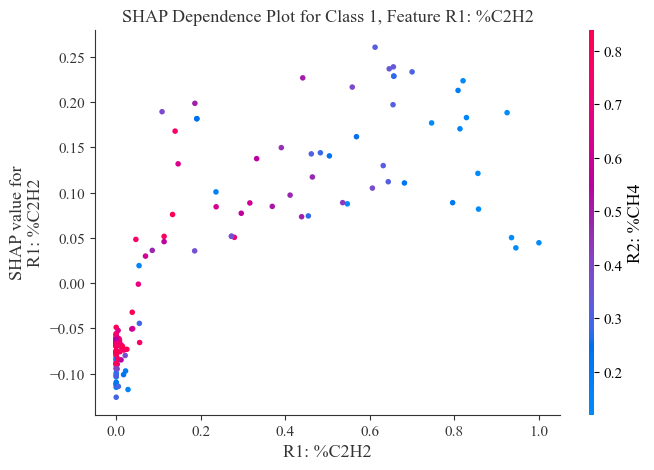

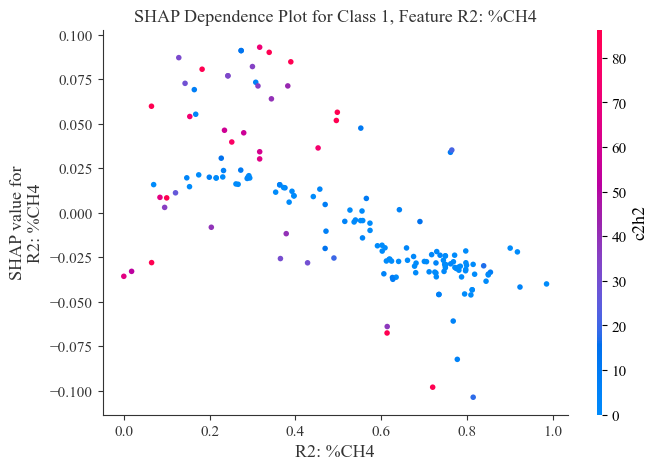

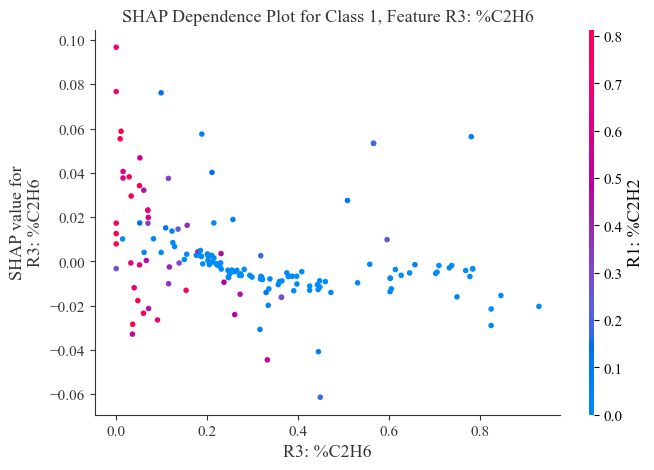

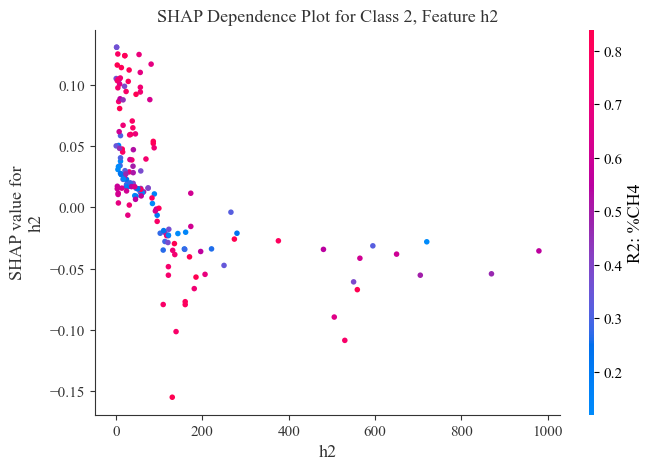

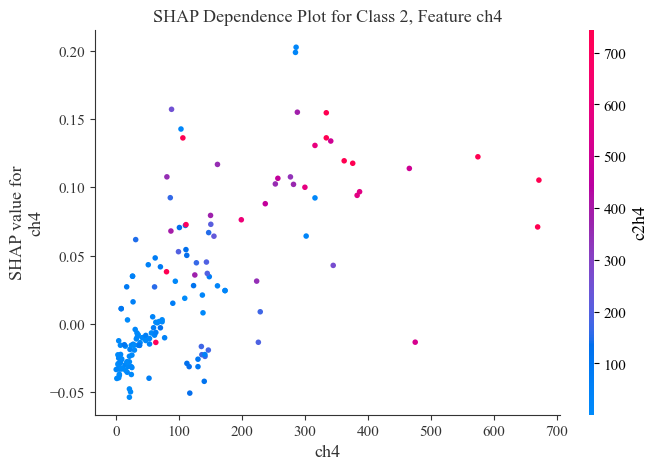

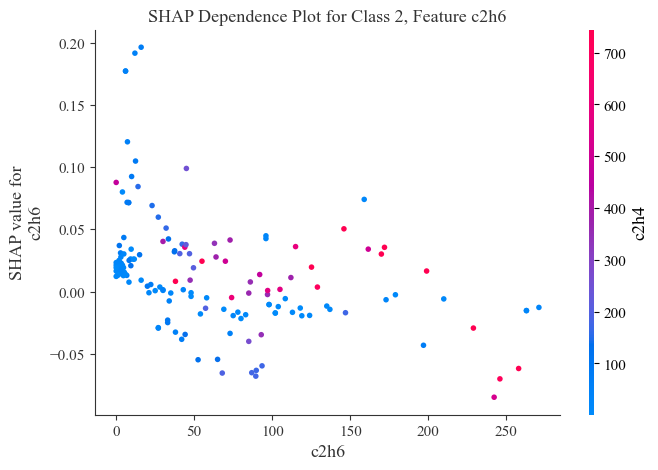

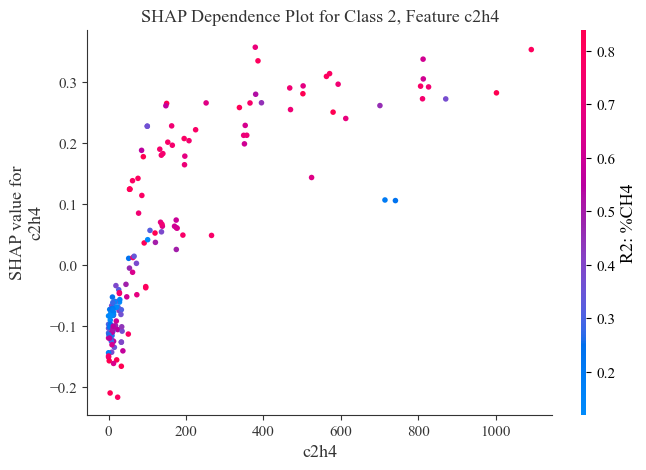

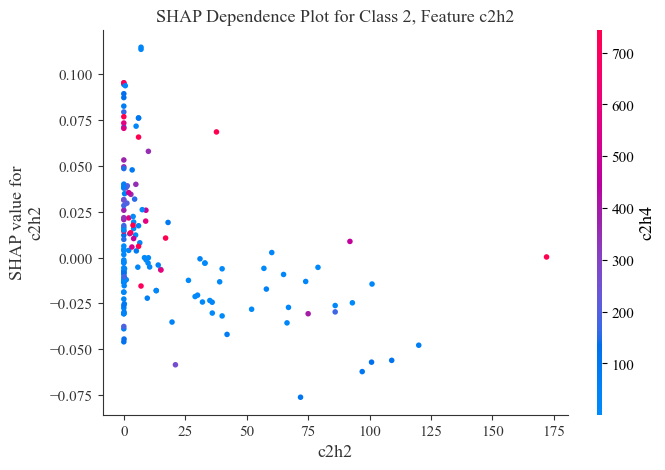

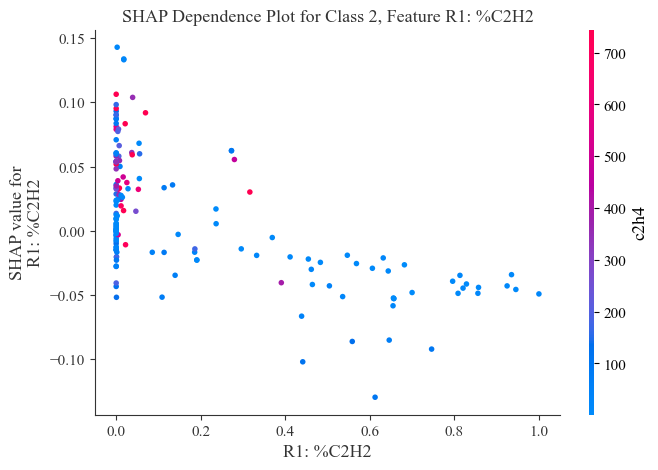

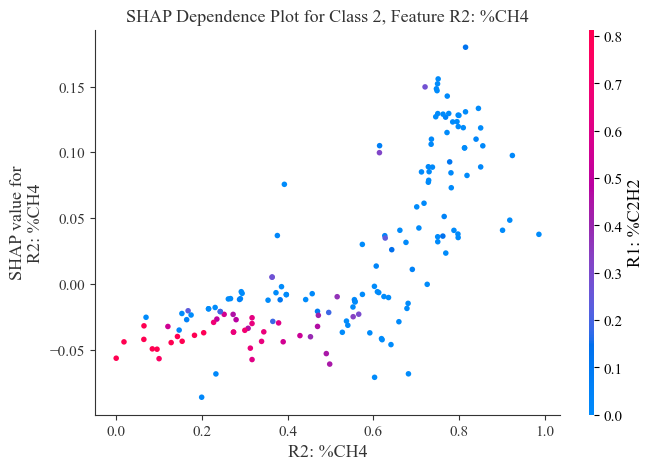

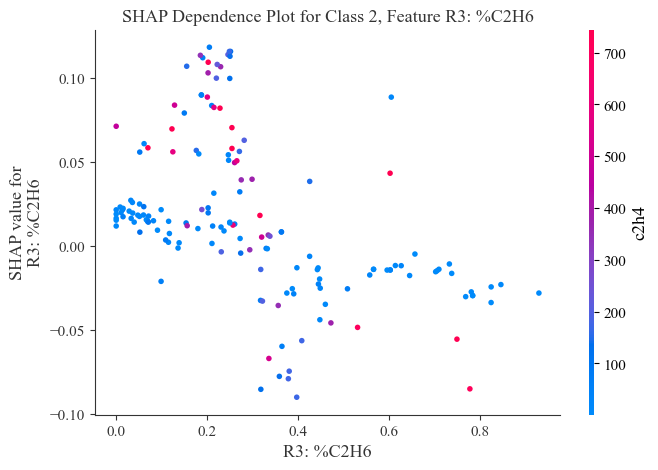

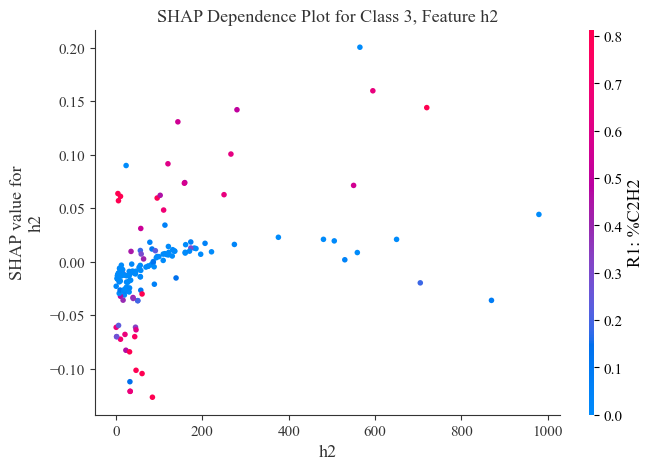

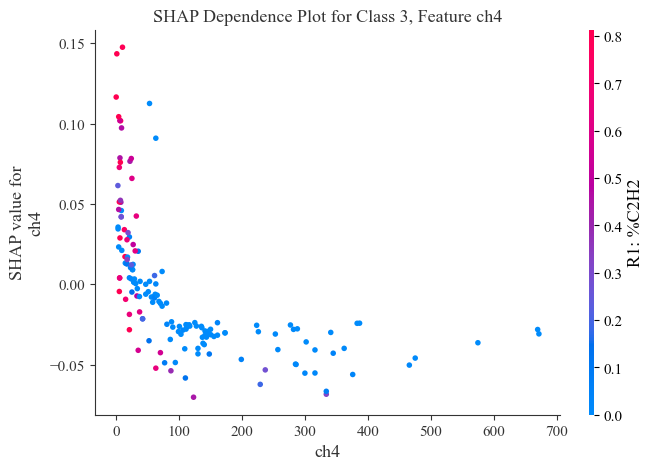

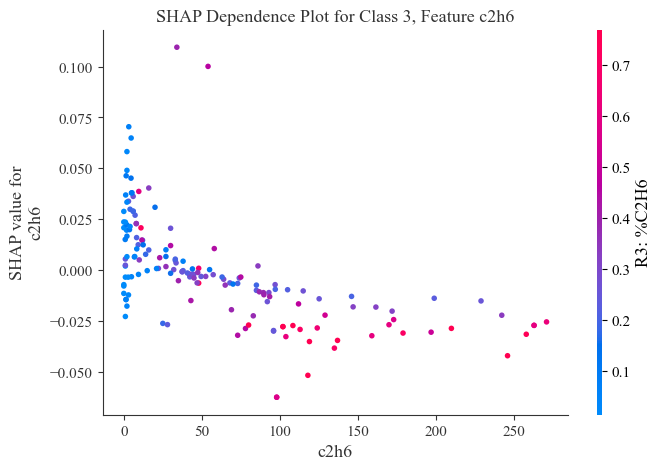

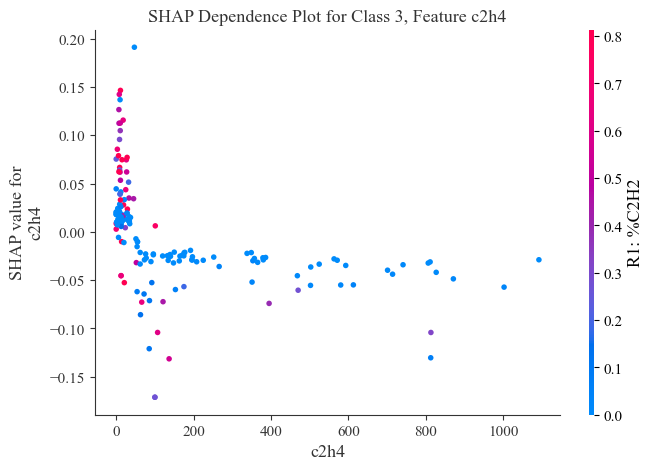

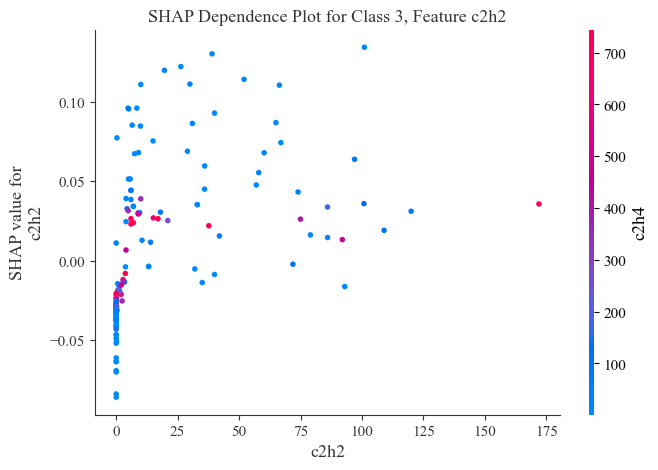

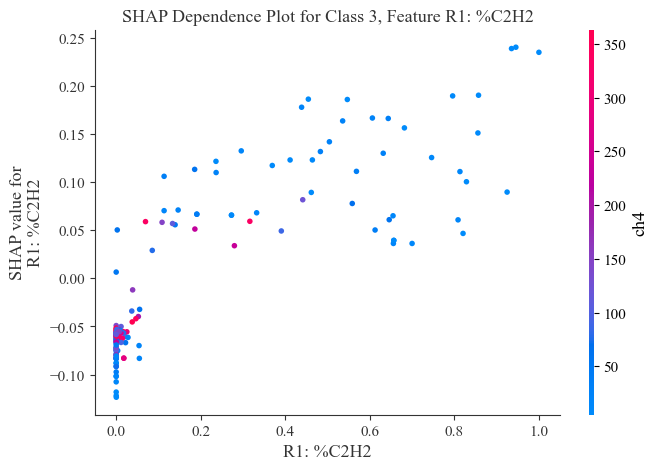

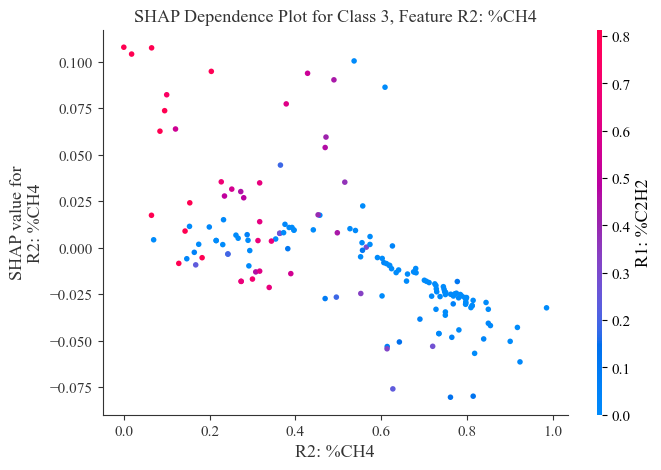

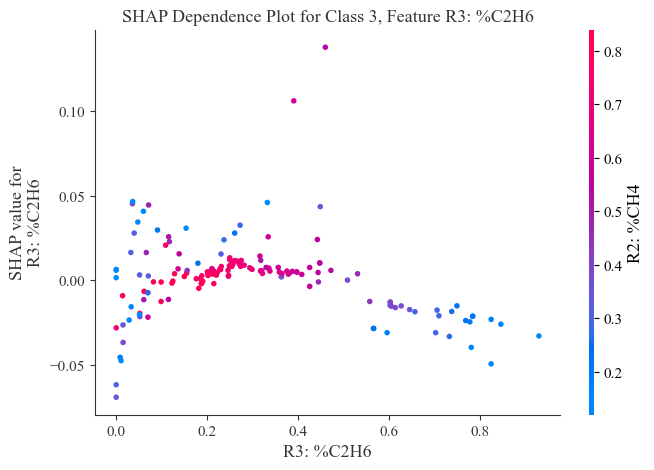

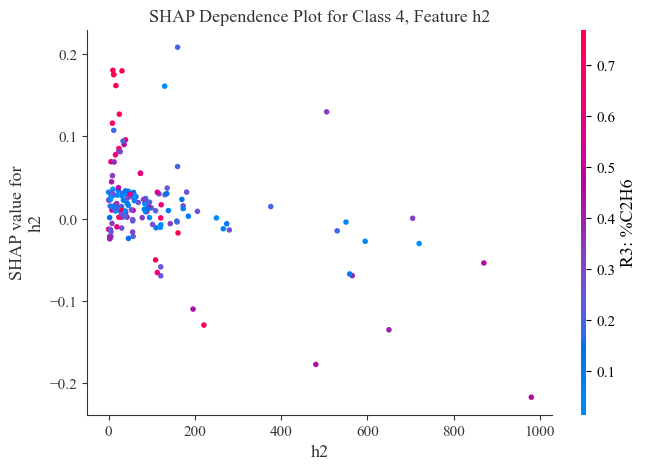

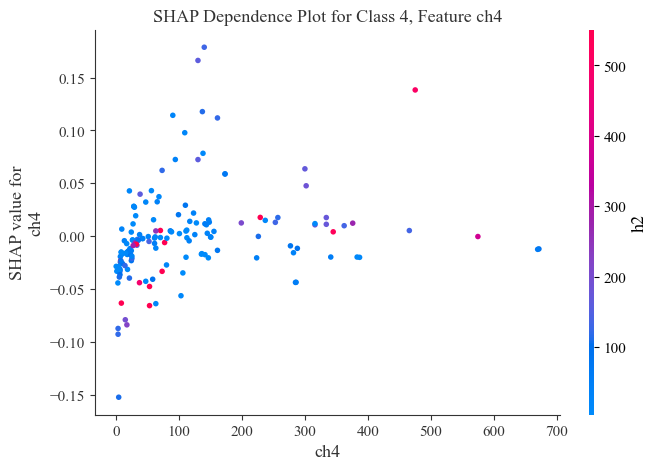

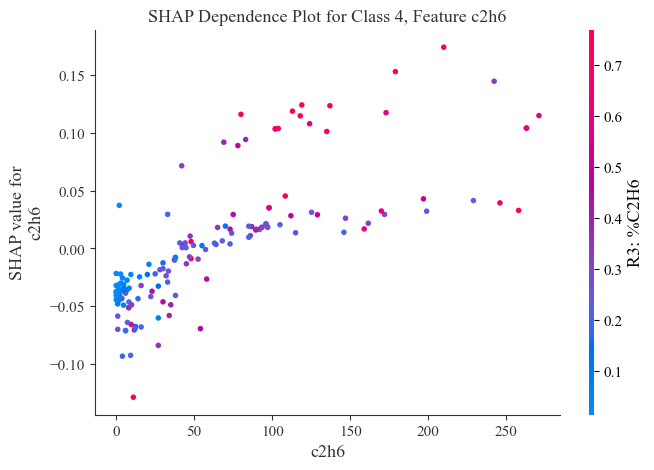

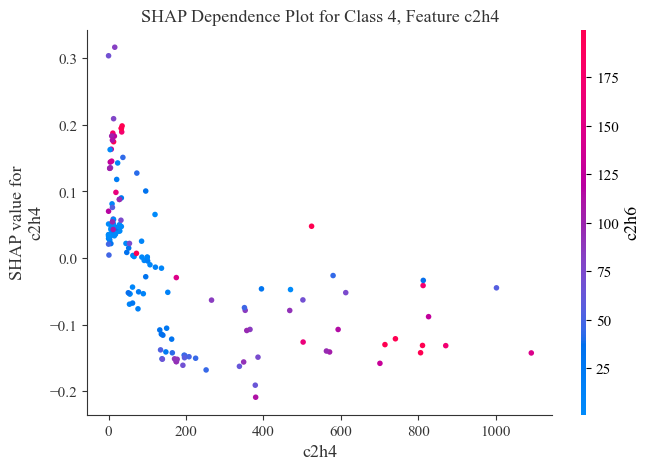

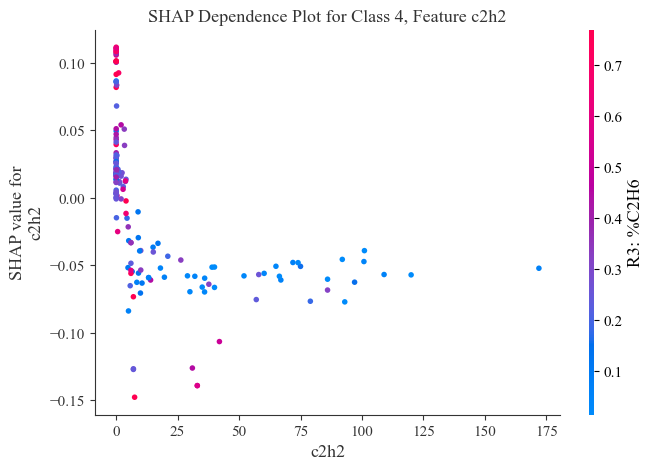

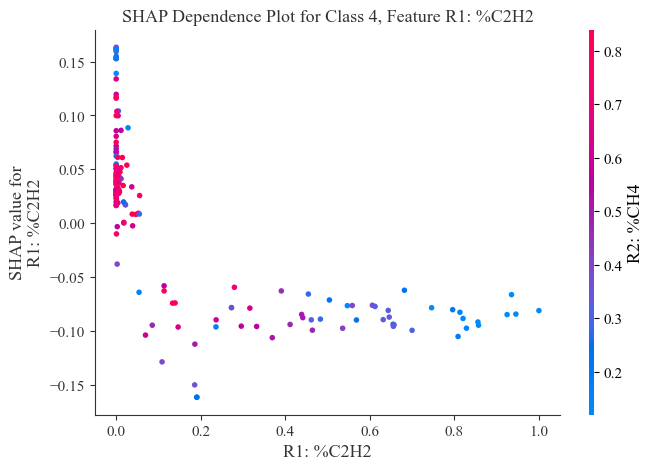

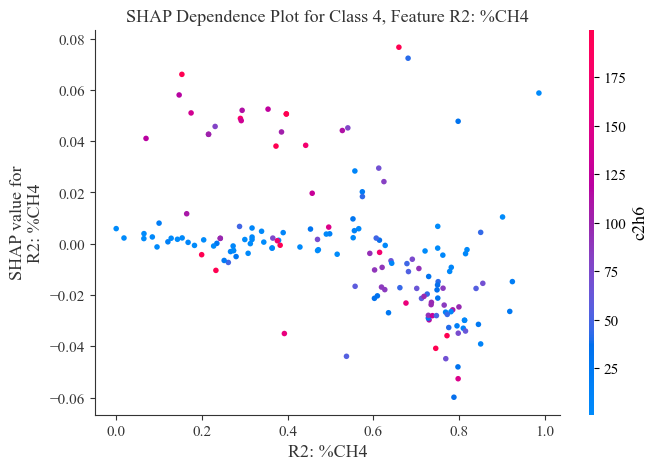

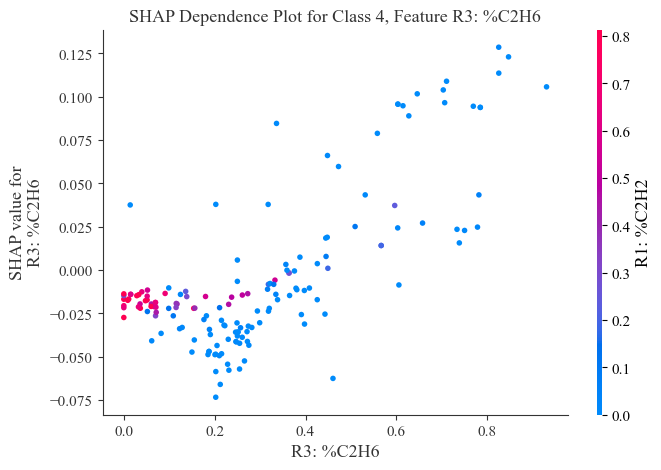

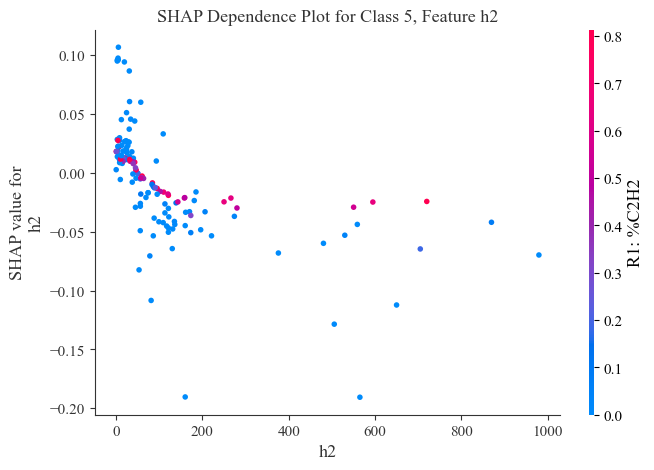

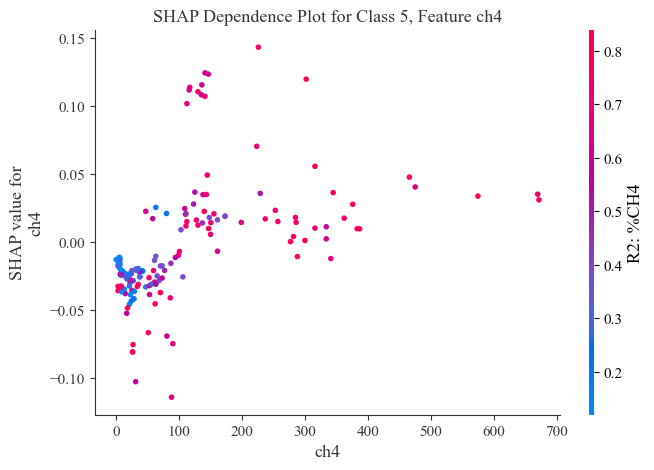

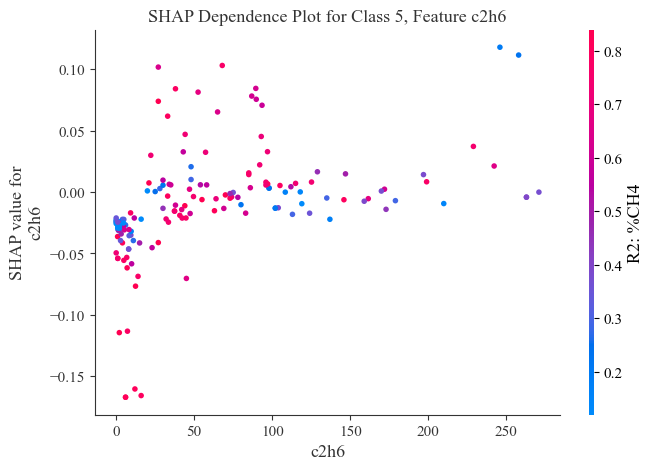

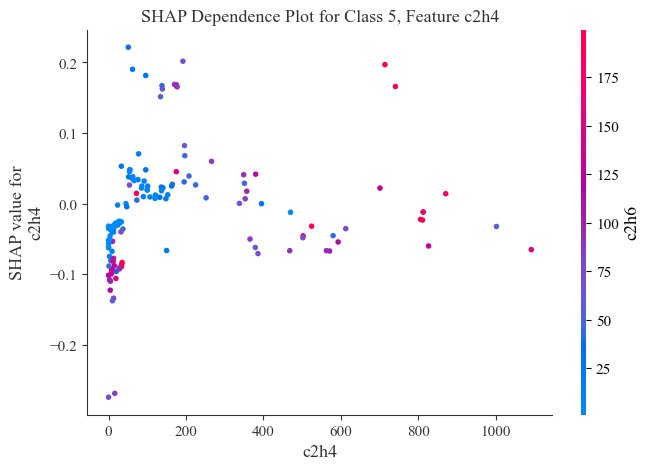

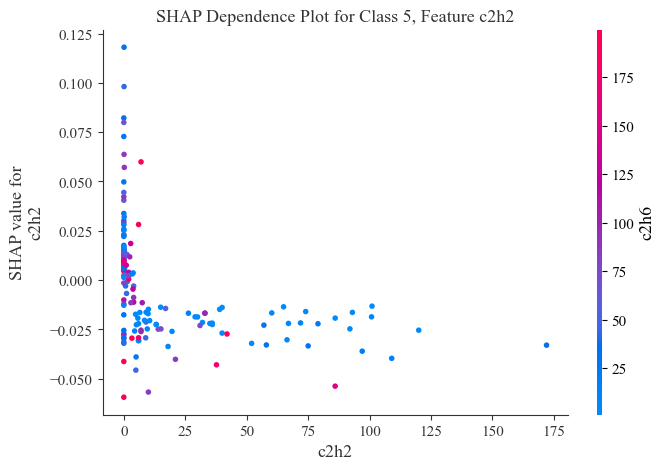

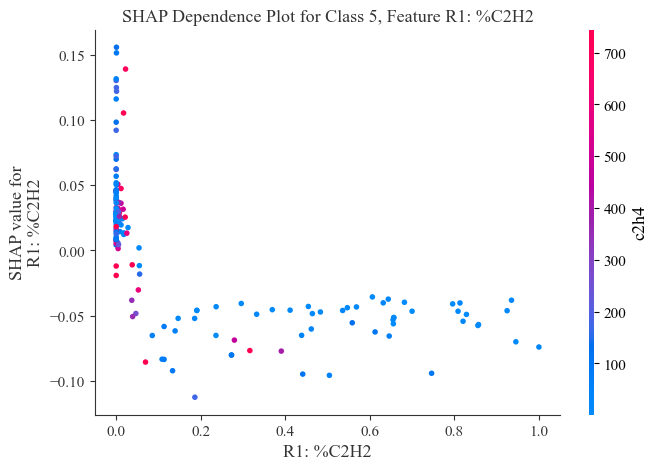

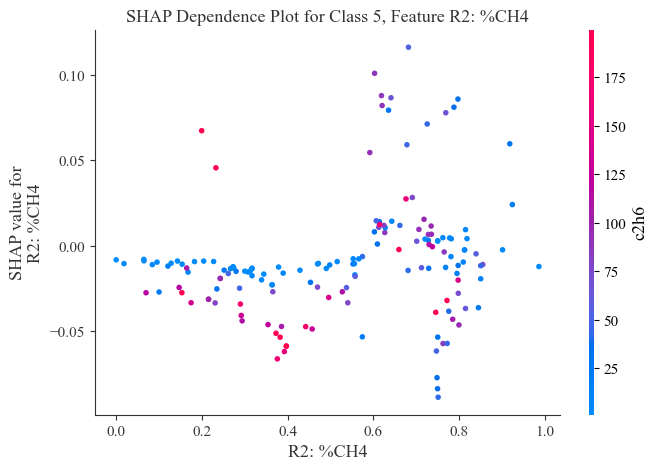

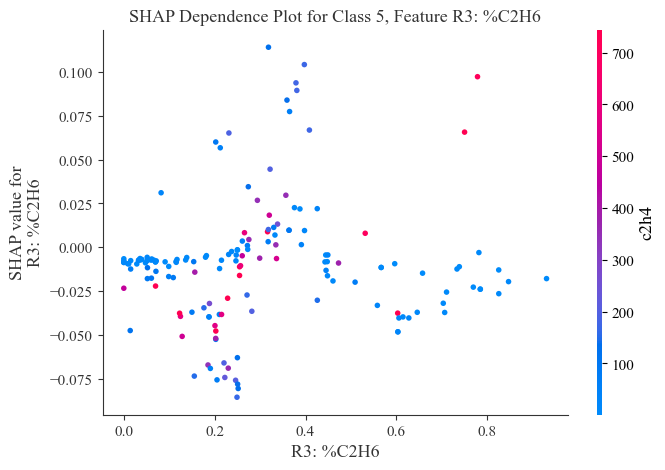

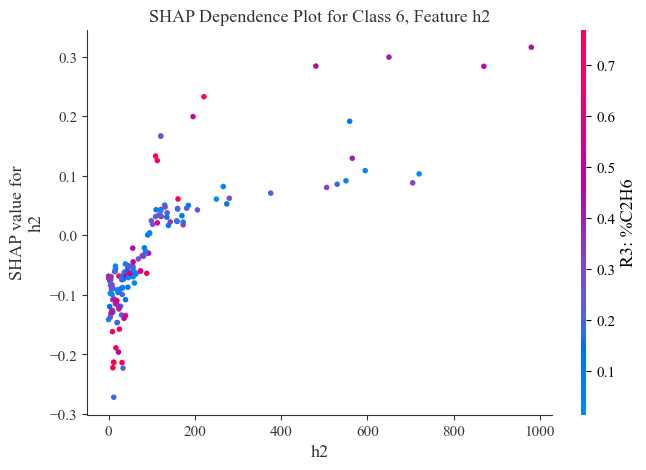

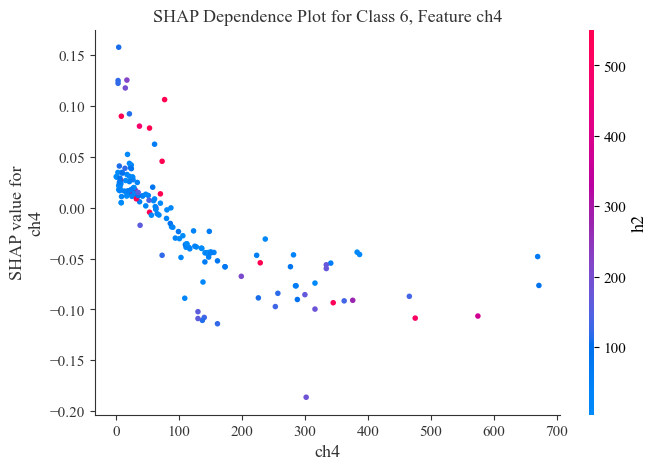

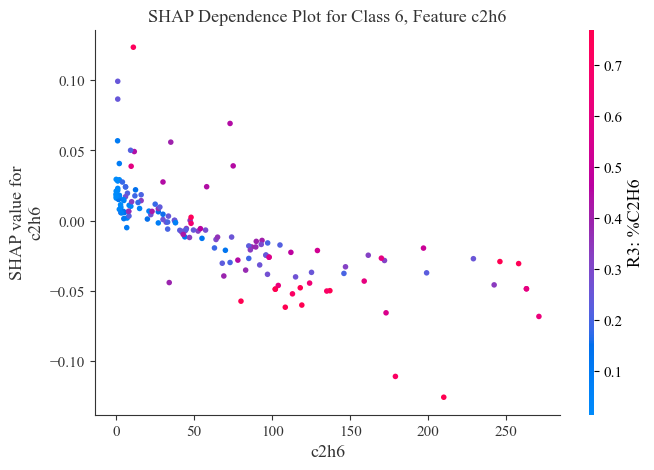

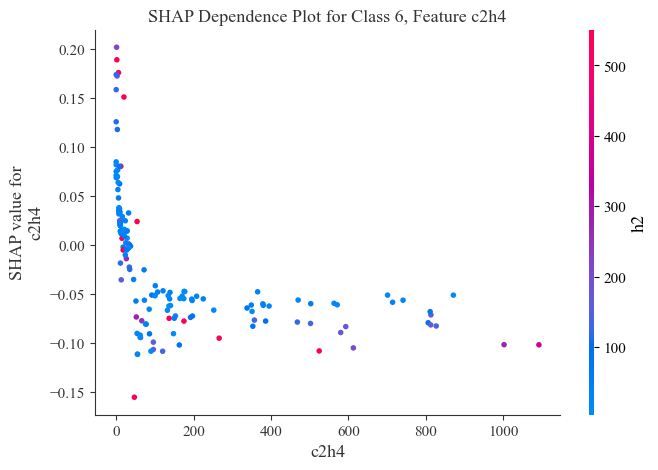

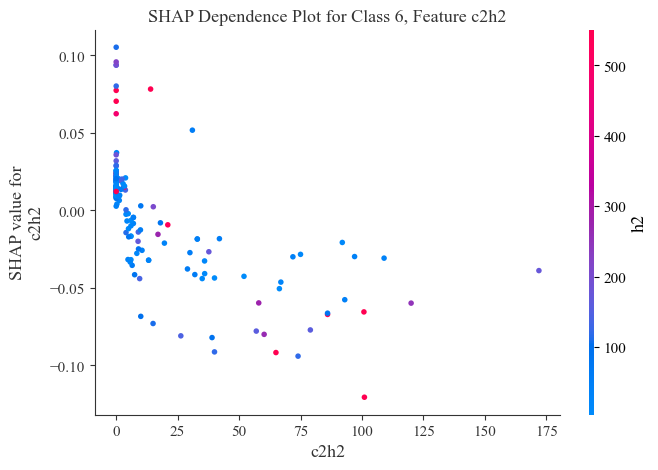

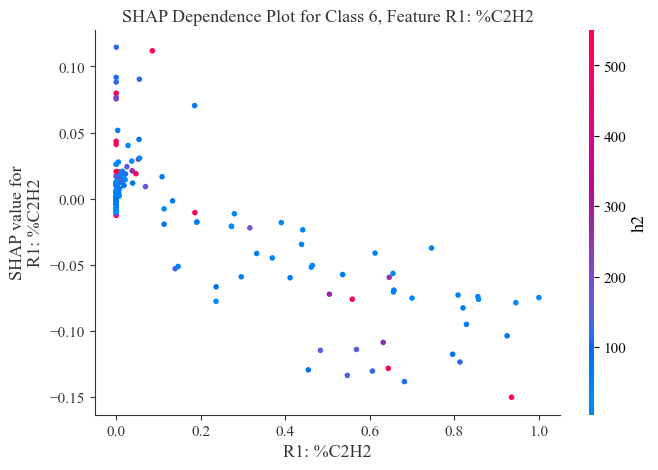

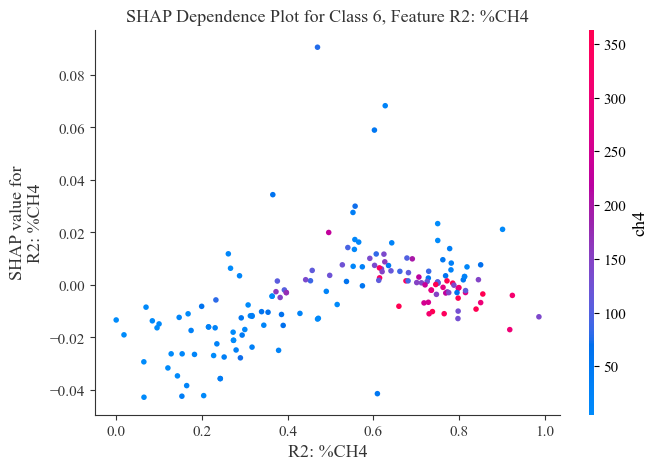

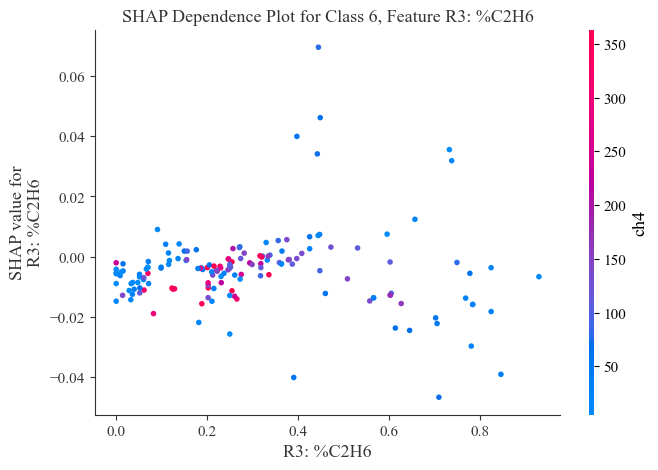

In [50]:
import shap
import matplotlib.pyplot as plt

# 假设 final_model, X_test, shap_values 已定义

for i, class_name in enumerate(model.classes_):
    for feature_name in X_test.columns:
        shap.dependence_plot(feature_name, shap_values[:, :, i], X_test, title=f"SHAP Dependence Plot for Class {class_name}, Feature {feature_name}")
        plt.show()

In [54]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 标签映射（可选）
label_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}
target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

# 修改后的训练评估函数
def train_and_evaluate(X_train, y_train, X_test, y_test):
    clf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)

    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report_dict).transpose()
    return report_df

# 定义定向SMOTE重采样器，仅增强类别1和3（HED和LED）
def targeted_smote(X, y, target_classes=[1, 3]):
    # 获取目标类别的样本索引
    idx_target = np.isin(y, target_classes)
    X_target = X[idx_target]
    y_target = y[idx_target]

    # 对目标类别过采样
    smote = SMOTE(random_state=42)
    X_resampled_target, y_resampled_target = smote.fit_resample(X_target, y_target)

    # 拼回原始数据中非目标类的数据
    X_non_target = X[~idx_target]
    y_non_target = y[~idx_target]

    X_final = np.concatenate([X_resampled_target, X_non_target], axis=0)
    y_final = np.concatenate([y_resampled_target, y_non_target], axis=0)

    return X_final, y_final

# 存储结果
results = OrderedDict()
results['No Oversampling'] = train_and_evaluate(X_train, y_train, X_test, y_test)

# 正常 SMOTE（对所有类别过采样）
resamplers = {
    'SMOTE (All)': SMOTE(random_state=42),
    'SMOTE (HED+LED only)': 'targeted'  # 自定义处理方式
}

for name, sampler in resamplers.items():
    if sampler == 'targeted':
        X_res, y_res = targeted_smote(X_train, y_train)
    else:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

    results[name] = train_and_evaluate(X_res, y_res, X_test, y_test)

# 输出每类 precision/recall/f1
print("\n=== 每类指标报告 ===")
for method, report_df in results.items():
    print(f"\n[{method}]")
    print(report_df.loc[target_names][['precision', 'recall', 'f1-score']].round(4))



=== 每类指标报告 ===

[No Oversampling]
     precision  recall  f1-score
HED     0.7857  0.8462    0.8148
HT      0.9483  0.9649    0.9565
LED     0.7273  0.7619    0.7442
LT      1.0000  0.8621    0.9259
MT      0.9333  1.0000    0.9655
PD      0.9167  0.8462    0.8800

[SMOTE (All)]
     precision  recall  f1-score
HED     0.8148  0.8462    0.8302
HT      0.9483  0.9649    0.9565
LED     0.7500  0.8571    0.8000
LT      1.0000  0.8966    0.9455
MT      1.0000  1.0000    1.0000
PD      1.0000  0.8462    0.9167

[SMOTE (HED+LED only)]
     precision  recall  f1-score
HED     0.7931  0.8846    0.8364
HT      0.9483  0.9649    0.9565
LED     0.7727  0.8095    0.7907
LT      1.0000  0.8621    0.9259
MT      0.9333  1.0000    0.9655
PD      1.0000  0.8462    0.9167


In [55]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 标签映射
label_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}
target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

# 分类模型训练与评估
def train_and_evaluate(X_train, y_train, X_test, y_test):
    clf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)

    report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report_dict).transpose()
    return report_df

# 基于已有采样结果，再次采样类别1和3
def reinforce_classes(X, y, target_classes=[1, 3], random_state=42):
    idx_target = np.isin(y, target_classes)
    X_target = X[idx_target]
    y_target = y[idx_target]

    smote = SMOTE(random_state=random_state)
    X_target_resampled, y_target_resampled = smote.fit_resample(X_target, y_target)

    # 其余类别保持不变
    X_others = X[~idx_target]
    y_others = y[~idx_target]

    X_final = np.concatenate([X_others, X_target_resampled], axis=0)
    y_final = np.concatenate([y_others, y_target_resampled], axis=0)

    return X_final, y_final

# 存储结果
results = OrderedDict()

# 1. 无采样
results['No Oversampling'] = train_and_evaluate(X_train, y_train, X_test, y_test)

# 2. SMOTE所有类别
smote_all = SMOTE(random_state=42)
X_smote_all, y_smote_all = smote_all.fit_resample(X_train, y_train)
results['SMOTE (All)'] = train_and_evaluate(X_smote_all, y_smote_all, X_test, y_test)

# 3. SMOTE所有 + 再对1/3采样
X_smote_all_reinforced, y_smote_all_reinforced = reinforce_classes(X_smote_all, y_smote_all, target_classes=[1, 3])
results['SMOTE (All) + Extra HED+LED'] = train_and_evaluate(X_smote_all_reinforced, y_smote_all_reinforced, X_test, y_test)

# 输出每类指标
print("\n=== 每类指标报告 ===")
for method, report_df in results.items():
    print(f"\n[{method}]")
    print(report_df.loc[target_names][['precision', 'recall', 'f1-score']].round(4))



=== 每类指标报告 ===

[No Oversampling]
     precision  recall  f1-score
HED     0.7857  0.8462    0.8148
HT      0.9483  0.9649    0.9565
LED     0.7273  0.7619    0.7442
LT      1.0000  0.8621    0.9259
MT      0.9333  1.0000    0.9655
PD      0.9167  0.8462    0.8800

[SMOTE (All)]
     precision  recall  f1-score
HED     0.8148  0.8462    0.8302
HT      0.9483  0.9649    0.9565
LED     0.7500  0.8571    0.8000
LT      1.0000  0.8966    0.9455
MT      1.0000  1.0000    1.0000
PD      1.0000  0.8462    0.9167

[SMOTE (All) + Extra HED+LED]
     precision  recall  f1-score
HED     0.7857  0.8462    0.8148
HT      0.9483  0.9649    0.9565
LED     0.7273  0.7619    0.7442
LT      1.0000  0.8621    0.9259
MT      0.9333  1.0000    0.9655
PD      0.9167  0.8462    0.8800


# All